# test

In [1]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import FinanceDataReader as fdr

In [3]:
etfs = fdr.StockListing('ETF/KR') # 한국 ETF 전종목

In [4]:
#cond = etfs.Name.str.contains('KODEX') & etfs.Name.str.contains('S&P')
#cond = etfs.Name.str.contains('ACE KRX')
cond = etfs.Name.str.contains('미국채혼합')
etfs.loc[cond]

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
244,284430,6,KODEX 200미국채혼합,13010,2,60,0.46,12981.0,2.8052,41313,537,770


In [5]:
symbols = ['379800', '411060', '284430']
etfs.loc[etfs.Symbol.isin(symbols), 'Name']

20     KODEX 미국S&P500TR
122          ACE KRX금현물
244      KODEX 200미국채혼합
Name: Name, dtype: object

In [6]:
names = etfs.loc[etfs.Symbol.isin(symbols), 'Name'].to_list()

In [7]:
df = fdr.DataReader(','.join(symbols), '2010')
df = df.rename(columns=dict(zip(symbols, names)))

<Axes: xlabel='Date'>

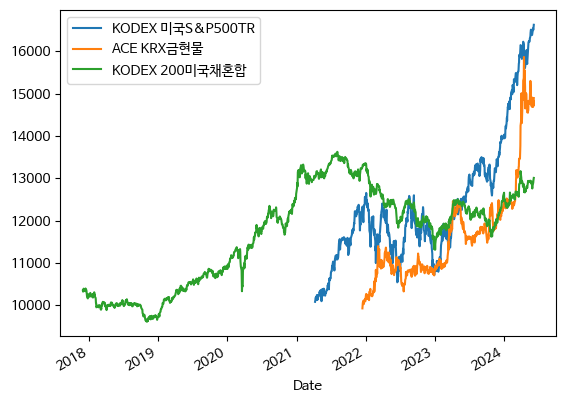

In [15]:
df.plot()

In [9]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

381


In [10]:
[x for x in font_list if 'nanum' in x.lower()]

['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

In [14]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

In [ ]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'

# bond

In [4]:
def valuate_bond(face, rate, year, ytm, n_pay=1):
    """
    face: face value
    rate: coupon rate (annual)
    year: years to maturity
    ytm: discount rate (annual)
    n_pay: number of payments per year
    """
    c = face * rate / n_pay
    vc = 0
    r_discount = ytm/n_pay
    # calc The present value of expected cash flows
    for t in range(1, year*n_pay+1):
        vc += c/(1+r_discount)**t
    # the present value of the face value of the bond added
    return vc + face/(1+r_discount)**(year*n_pay)


valuate_bond(1000, 0.05, 2, 0.03, 2)

1038.5438464755177

In [7]:
F = 10000
R = 0.1
Y = 3
N = 4
YTM = 0.05
valuate_bond(F, R, Y, YTM, N)

11384.913995754627

In [10]:
ytm = [0.1, 0.05, 0.15]
[valuate_bond(F, R, Y, x, N)/F-1 for x in ytm]

[8.881784197001252e-16, 0.13849139957546264, -0.1190336739925082]

# bt

In [1]:
import bt

In [2]:
data = bt.get("spy", start="2017-01-01")
s1 = bt.Strategy("DAC", [bt.algos.SelectAll(), 
                        bt.algos.CapitalFlow(100000),
                        bt.algos.WeighEqually(), 
                        bt.algos.RunWeekly(),
                        bt.algos.Rebalance()])

s2 = bt.Strategy("BnH", [bt.algos.SelectAll(), 
                        bt.algos.WeighEqually(), 
                        bt.algos.RunWeekly(), 
                        bt.algos.Rebalance()],)
t1 = bt.Backtest(s1, data)
t2 = bt.Backtest(s2, data)
res = bt.run(t1, t2)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
/home/lbk/.cache/pypoetry/virtualenvs/pf-APoYtgC9-py3.12/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/lbk/.cache/pypoetry/virtualenvs/pf-APoYtgC9-py3.12/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()
/home/lbk/.cache/pypoetry/virtualenvs/pf-APoYtgC9-py3.12/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/lbk/.cache/pypoetry/virtualenvs/pf-APoYtgC9-py3.12/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and 

<Axes: title={'center': 'Equity Progression'}>

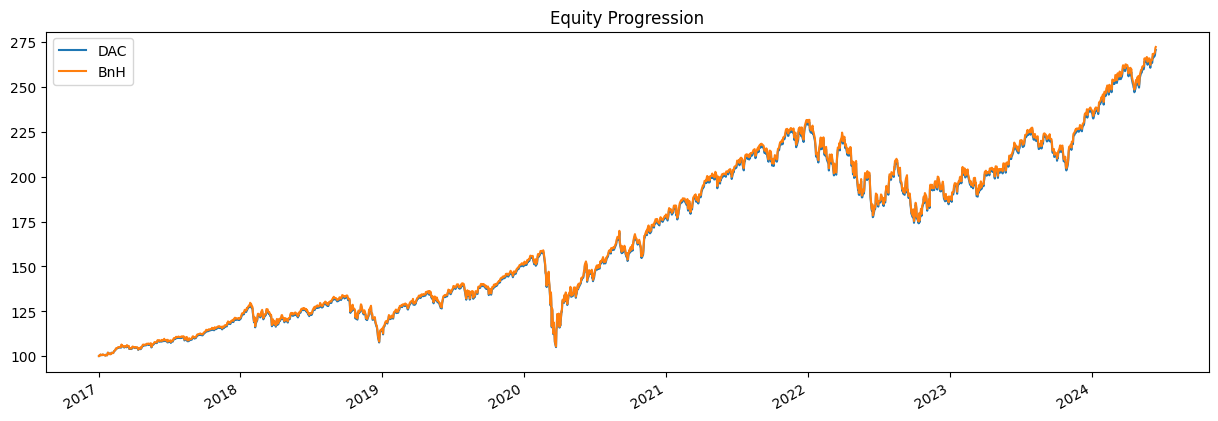

In [3]:
res.plot()

# pymc

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

In [4]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.15.1


In [5]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [6]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:01

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


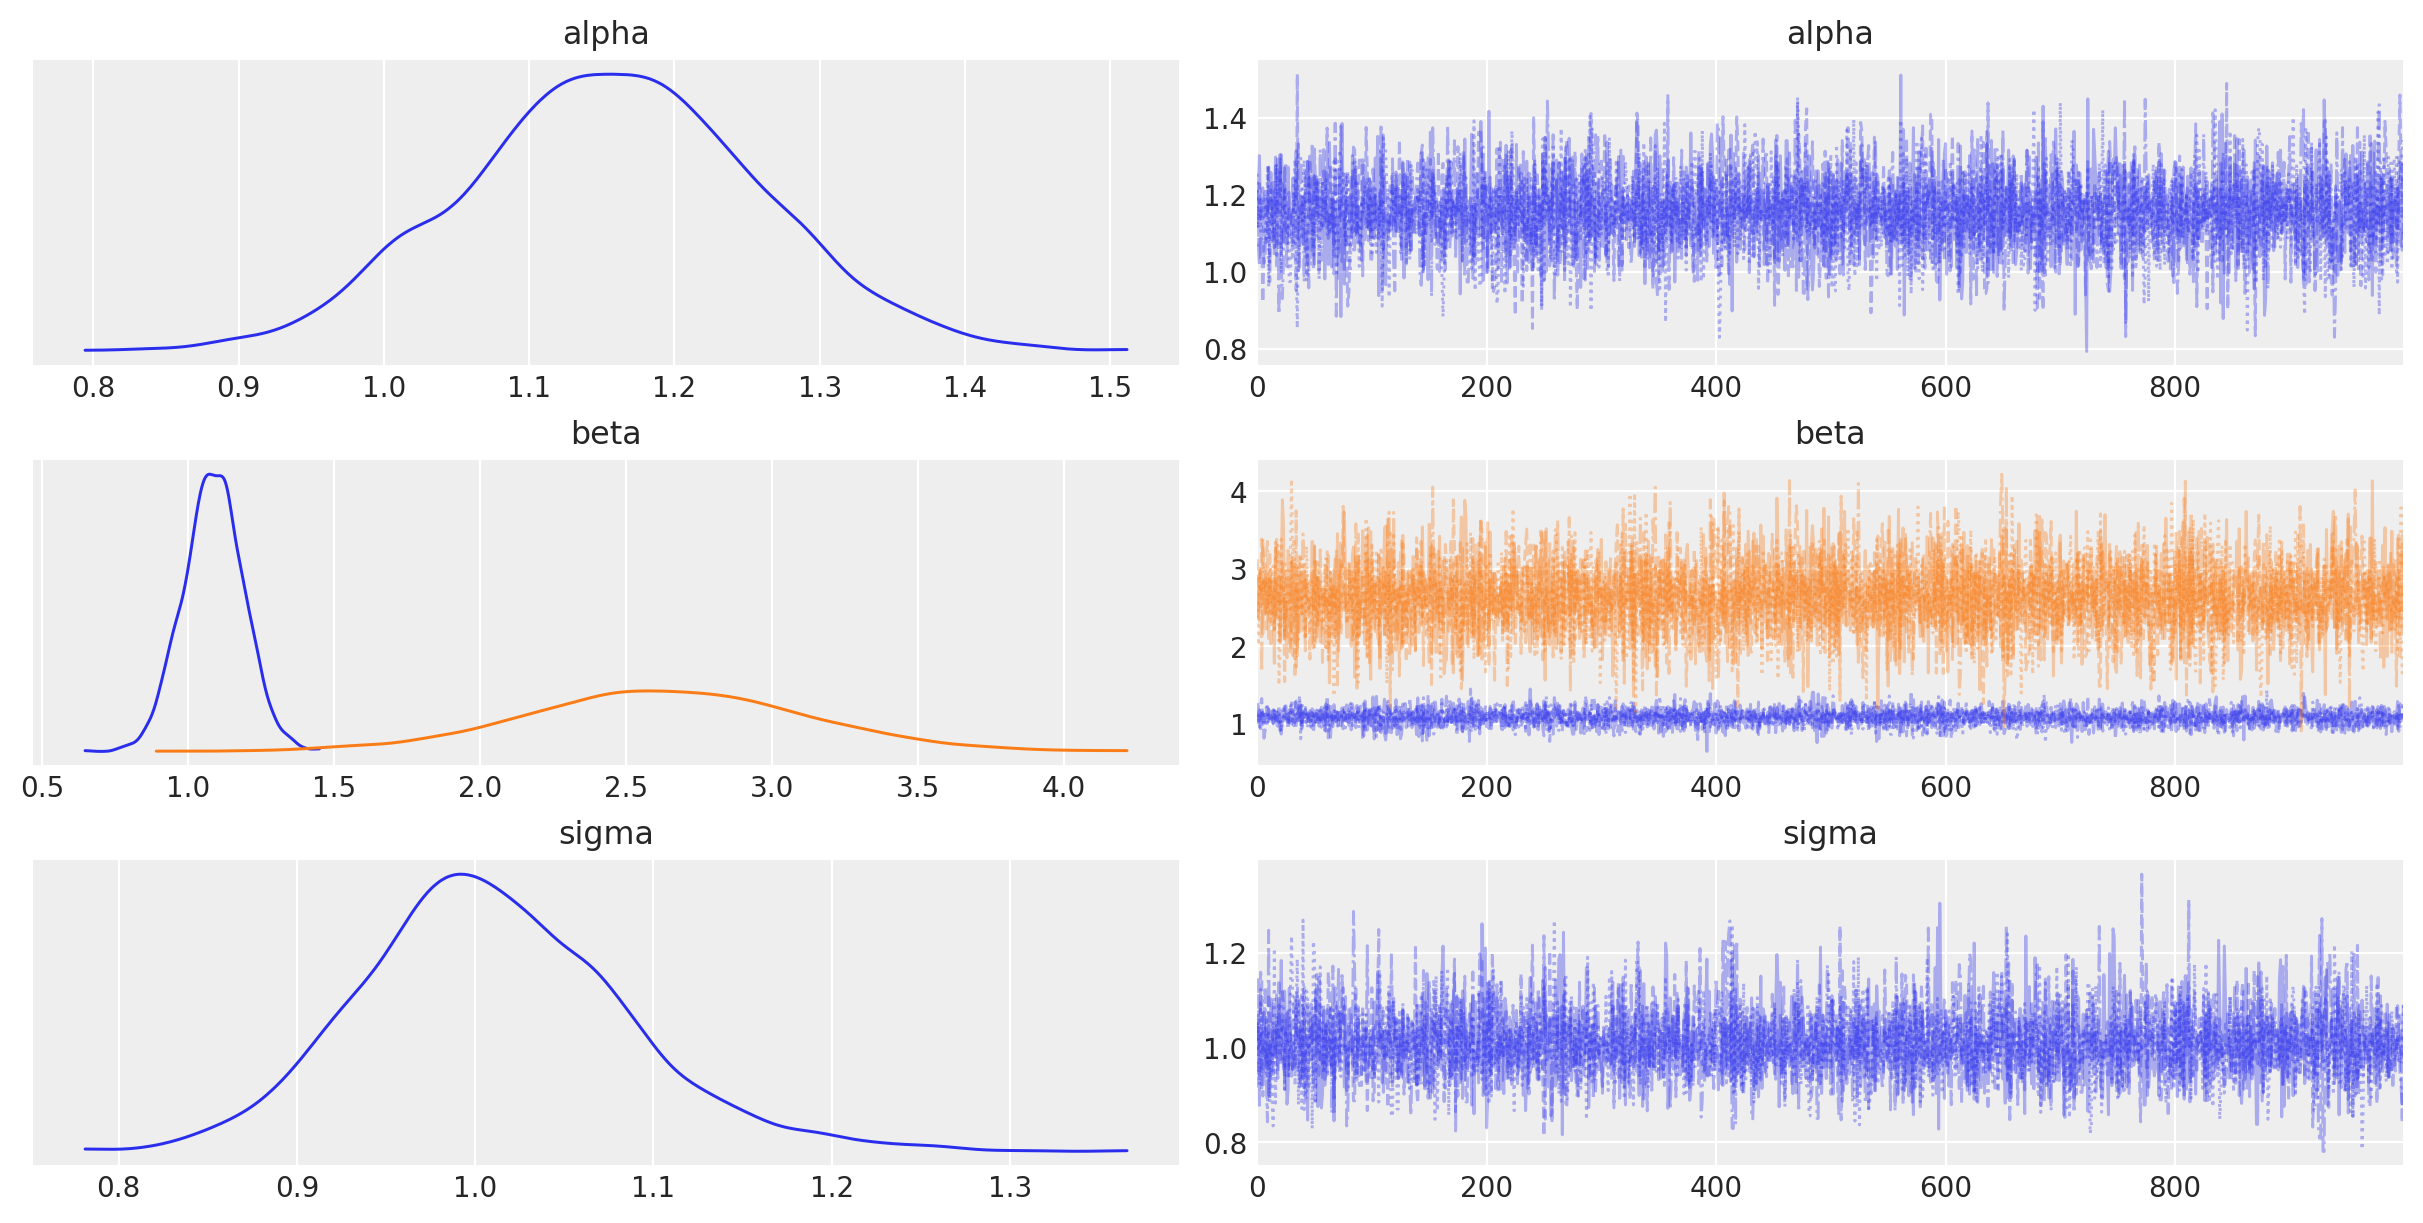

In [7]:
az.plot_trace(idata, combined=True);

# XML

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

In [2]:
path_data = 'data'

In [12]:
def read_xml(file, path, col_val='rate', 
             tag_iter='prfRtList', tag_date='standardDt', tag_val='managePrfRate'):
    tree = ET.parse(f'{path}/{file}')
    root = tree.getroot()
    
    data = list()
    for x in root.iter(tag_iter):
        date = x.find(tag_date).text
        val = x.find(tag_val).text
        data.append((date,val))
    
    df = pd.DataFrame().from_records(data, columns=['date', col_val]).set_index('date').astype(float)
    df.index = pd.to_datetime(df.index)
    return df

In [17]:
from pf_utils import get_file_list

def 

for f in get_file_list(file, path)

['K55306CV9946.xml',
 'KR5101888398.xml',
 'KR5236AS4826.xml',
 'KR5370AP9956.xml']

In [6]:
df.tail(10)

,rate
date,
2023-09-27,5.25
2023-10-31,5.48
2023-11-30,7.20
2023-12-29,8.29
2024-01-31,8.80
2024-02-29,9.24
2024-03-29,9.96
2024-04-30,10.23
2024-05-31,10.93


In [7]:
file = 'KR5101888398_240628.csv'
df.to_csv(f'{path_data}/{file}')

In [6]:
path_data = 'data'

In [8]:
from pf_utils import DataManager

file_mf = 'mutual_funds.csv'

mf = DataManager(
    universe = 'FUND',
    file = file_mf, upload_type = 'rate',
    path = path_data
)
mf.upload()
mf.get_date_range()

Estimating price from rate ...
  error: -0.00 %
1 assets from 2010-01-29 to 2024-06-28 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-06-28


<Axes: xlabel='date'>

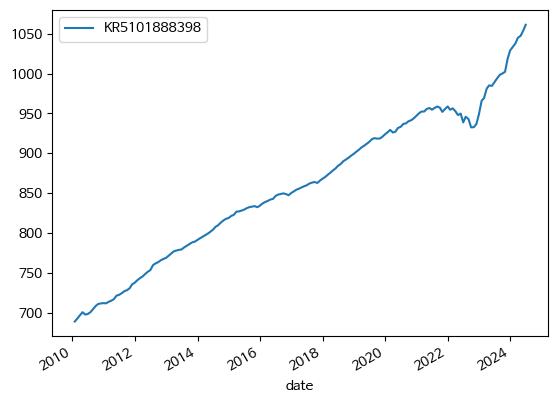

In [9]:
mf.df_prices.plot()

In [27]:
from pf_utils import AssetEvaluator

df = mf.df_prices
ae = AssetEvaluator(df, 12)

In [36]:
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

,KR5101888398
start,2010-01-29
end,2024-06-28
total_return,0.5395
cagr,0.03039
calmar,1.112431
max_drawdown,-0.027318
avg_drawdown,-0.004697
avg_drawdown_days,77.090909
daily_vol,NaN
daily_sharpe,NaN


In [32]:
df.pct_change(1).dropna().mean() * 12

KR5101888398    0.03003
dtype: float64

In [35]:
df.pct_change(1).dropna().std() * 12 ** .5

KR5101888398    0.011488
dtype: float64

# pykrx

In [1]:
from pykrx import stock

In [2]:
date = '20240930'

tickers = stock.get_market_ticker_list(date, market='KOSPI')
tickers += stock.get_market_ticker_list(date, market='KOSDAQ')

In [3]:
assetnames = {x:stock.get_market_ticker_name(x) for x in tickers}

In [5]:
%%time

import time
import pandas as pd


start = '20240901'
end = '20240930'
cols = ['종가', '거래량']
col_tck = 'ticker'

df_universe = pd.DataFrame()

for x in tickers[:3]:
    df = stock.get_market_ohlcv(start, end, x)
    df[col_tck] = x
    df_universe = pd.concat([df_universe, df])
    time.sleep(1)
    

CPU times: user 34.4 ms, sys: 458 μs, total: 34.8 ms
Wall time: 3.16 s


In [6]:
df_universe[cols+[col_tck]].rename_axis(col_date).set_index(col_tck, append=True).swaplevel().rename(columns=dict(zip(cols, ['price','volume'])))

NameError: name 'col_date' is not defined

In [18]:
%%time

df_universe = pd.DataFrame()

for x in tickers:
    df = stock.get_market_ohlcv(start, end, x)
    df_universe[x] = df[col_price_kr]
    time.sleep(1)

KeyboardInterrupt: 

In [19]:
%%time

import time

start = '20240901'
end = '20240930'

col_price_kr = '종가'
col_ticker = 'ticker'
col_date = 'date'

CPU times: user 7 μs, sys: 2 μs, total: 9 μs
Wall time: 11.2 μs


In [ ]:
%%time
import time
from tqdm import tqdm

class TimeTracker:
    def __init__(self):
        # Initialize and store the start time
        self.start_time = None
        self.last_pause_time = None  # Track time since the last pause
    
    def start(self):
        # Start the timer
        self.start_time = time.time()
        self.last_pause_time = self.start_time  # Initialize the last pause time
    
    def elapsed(self):
        # Return the time elapsed since the start
        if self.start_time is None:
            raise ValueError("Timer has not been started. Use the 'start()' method.")
        return time.time() - self.start_time

    def pause(self, interval=5, pause_duration=1, msg=True):
        """
        Pauses execution for 'pause_duration' seconds if 'interval' seconds have passed
        since the last pause or the start of the timer.
        """
        current_time = time.time()
        if current_time - self.last_pause_time >= interval:
            if msg:
                print(f"Pausing for {pause_duration} second(s) after {interval} seconds elapsed...")
            time.sleep(pause_duration)  # Pause for the given duration
            self.last_pause_time = current_time  # Update the last pause time

In [46]:
tracker = TimeTracker()  # Initialize the time tracker
tracker.start()  # Start the timer

get_price = lambda x: stock.get_market_ohlcv(start, end, x)[col_price_kr].rename(x)
df_universe = get_price(tickers[0])

for x in tqdm(tickers[1:]):
    df = get_price(x)
    df_universe = pd.concat([df_universe, df], axis=1)
    tracker.pause(msg=False)

100%|███████████████████████████████████████████████████████████| 2713/2713 [02:53<00:00, 15.62it/s]


In [47]:
df_universe

,095570,006840,027410,282330,138930,001460,001465,001040,079160,00104K,...,215090,263920,243070,084110,145020,024060,010240,189980,037440,238490
날짜,,,,,,,,,,,,,,,,,,,,,
2024-09-02,4565,13460,3505,119300,9930,34500,13340,111900,6950,85700,...,1505,1073,29200,24700,257000,14670,4945,1857,5320,4615
2024-09-03,4595,13390,3510,121000,10130,34300,13410,116800,7060,88200,...,1505,1061,29100,24700,247500,15030,4925,1893,5340,4405
2024-09-04,4490,12850,3485,118000,9830,33500,13290,114500,6720,88200,...,1505,1040,28200,23850,235000,14080,4855,1800,5240,4270
2024-09-05,4475,13000,3455,120500,9950,33800,13250,114600,6710,88900,...,1505,1062,27800,23800,237500,14340,4835,1775,5030,4205
2024-09-06,4420,12940,3440,118200,9930,33550,13400,117000,6730,91500,...,1505,1038,27550,23850,242500,14550,4805,1712,4875,4170
2024-09-09,4545,13070,3460,119300,9820,33350,13130,122500,6810,94300,...,1505,1041,28750,24400,248000,14720,4785,1742,5080,4180
2024-09-10,4550,13060,3435,119000,9860,33350,13070,121100,6490,92800,...,1505,1040,28350,25900,251500,14550,4750,1776,4985,4180
2024-09-11,4570,13130,3415,122000,9180,33350,13110,121400,6320,92900,...,1505,1039,28500,26750,247500,14600,4705,1705,4990,4100
2024-09-12,4565,13200,3440,120500,9470,33150,13080,123900,6380,92700,...,1505,1056,28600,27000,248000,14980,4715,1776,5130,3950


In [ ]:
# Example usage
tracker = TimeTracker()  # Initialize the time tracker
tracker.start()  # Start the timer

df_universe = pd.DataFrame()
for x in tqdm(tickers):
    df = stock.get_market_ohlcv(start, end, x)
    #df_universe[x] = df[col_price_kr]
    df_universe = pd.concat([df_universe, df[col_price_kr].rename(x)], axis=1)
    tracker.pause(msg=False)

In [ ]:
# Example usage
tracker = TimeTracker()  # Initialize the time tracker
tracker.start()  # Start the timer

df_universe = pd.DataFrame()
for x in tqdm(tickers):
    df = stock.get_market_ohlcv(start, end, x)
    # The behavior of array concatenation with empty entries is deprecated
    df_universe = pd.concat([df_universe, df[col_price_kr].rename(x)])
    tracker.pause(msg=False)

In [39]:
df_universe
#df[col_price_kr].rename(x)
#df_universe.to_timestamp()

,095570,006840,027410,282330,138930,001460,001465,001040,079160,00104K,...,383220,007700,114090,078930,006360,001250,007070,078935,012630,039570
2024-09-02 00:00:00,4565,13460,3505,119300,9930,34500,13340,111900,6950,85700,...,58600,13690,11330,45050,20400,3990,21600,42200,11140,8300
2024-09-03 00:00:00,4595,13390,3510,121000,10130,34300,13410,116800,7060,88200,...,59600,13930,11670,47450,20250,3930,22100,43000,11180,8390
2024-09-04 00:00:00,4490,12850,3485,118000,9830,33500,13290,114500,6720,88200,...,57400,13400,11560,46050,19700,3730,21400,42000,11020,8250
2024-09-05 00:00:00,4475,13000,3455,120500,9950,33800,13250,114600,6710,88900,...,58600,13340,12070,47450,18800,3405,22550,42900,10960,8200
2024-09-06 00:00:00,4420,12940,3440,118200,9930,33550,13400,117000,6730,91500,...,56000,13200,11620,46650,18250,3275,22550,43300,10830,8090
2024-09-09 00:00:00,4545,13070,3460,119300,9820,33350,13130,122500,6810,94300,...,56800,13170,11620,45650,18670,3310,22450,42100,11170,8200
2024-09-10 00:00:00,4550,13060,3435,119000,9860,33350,13070,121100,6490,92800,...,55400,13230,11560,45800,18260,3325,22200,41800,10840,8200
2024-09-11 00:00:00,4570,13130,3415,122000,9180,33350,13110,121400,6320,92900,...,56600,13110,11560,43150,18350,3470,22500,40200,10810,8090
2024-09-12 00:00:00,4565,13200,3440,120500,9470,33150,13080,123900,6380,92700,...,57200,13280,11560,43550,18610,3510,22500,40500,10820,8120
2024-09-13 00:00:00,4570,13170,3500,118000,9750,33150,13280,121500,6260,90200,...,58900,13470,11820,44700,19170,4190,22600,43100,11070,8120


In [36]:
#len(tickers)
#len(df_universe.columns)
df[col_price_kr].rename(x).index

DatetimeIndex(['2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05',
               '2024-09-06', '2024-09-09', '2024-09-10', '2024-09-11',
               '2024-09-12', '2024-09-13', '2024-09-19', '2024-09-20',
               '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-30'],
              dtype='datetime64[ns]', name='날짜', freq=None)

In [21]:
df_universe = df_universe.rename_axis(col_date)
df_universe

,095570,006840,027410,282330,138930,001460,001465,001040,079160,00104K,...,001380,004060,001770,002360,009160,033530,123700,025530,034730,011790
date,,,,,,,,,,,,,,,,,,,,,
2024-09-02,4565,13460,3505,119300,9930,34500,13340,111900,6950,85700,...,2630,365,15890,536,3920,5020,3390,3455,143000,129200
2024-09-03,4595,13390,3510,121000,10130,34300,13410,116800,7060,88200,...,2570,368,15750,537,4040,5150,3365,3490,147400,127400
2024-09-04,4490,12850,3485,118000,9830,33500,13290,114500,6720,88200,...,2350,354,15590,519,4045,4980,3280,3440,141000,118700
2024-09-05,4475,13000,3455,120500,9950,33800,13250,114600,6710,88900,...,2415,351,15890,518,3970,4925,3265,3395,142300,116900
2024-09-06,4420,12940,3440,118200,9930,33550,13400,117000,6730,91500,...,2460,348,15560,504,3975,4720,3195,3385,140900,109100
2024-09-09,4545,13070,3460,119300,9820,33350,13130,122500,6810,94300,...,2640,350,15520,511,3975,4680,3190,3395,137600,111000
2024-09-10,4550,13060,3435,119000,9860,33350,13070,121100,6490,92800,...,2520,345,15380,513,4020,4715,3190,3400,141300,109800
2024-09-11,4570,13130,3415,122000,9180,33350,13110,121400,6320,92900,...,2425,340,15940,525,4010,4720,3230,3415,144000,122300
2024-09-12,4565,13200,3440,120500,9470,33150,13080,123900,6380,92700,...,2680,349,16100,526,4005,4860,3275,3500,144300,124700


In [8]:
from pf_utils import DataManager

path_data = 'data'
path_tran = 'transaction'
uv_k200 = ['kospi200', 'kospi200_prices.csv']

k200 = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_k200))
)
k200.upload()

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


201 assets from 2021-01-04 to 2024-09-30 uploaded.
df_prices updated


In [9]:
df_k200 = k200.df_prices
assetnames_k200 = k200.get_names()

In [12]:
assetnames_k200['005930']

'삼성전자'

## Class

In [10]:
start = '20240801'
end = '20240901'

col_price_kr = '종가'
col_ticker = 'ticker'
col_date = 'date'

In [29]:
from pykrx import stock
from tqdm import tqdm
from datetime import datetime

import pandas as pd
import time
import FinanceDataReader as fdr

In [3]:
date = end

tickers = stock.get_market_ticker_list(date, market='KOSPI')
tickers += stock.get_market_ticker_list(date, market='KOSDAQ')

In [4]:
assetnames = {x:stock.get_market_ticker_name(x) for x in tickers}

In [43]:
class TimeTracker:
    def __init__(self, auto_start=False):
        """
        Initialize the TimeTracker instance.
        If auto_start is True, the timer will start automatically upon initialization.
        """
        self.reset()
        if auto_start:
            self.start()

    def start(self):
        """Start the timer if it's not started or resume it if it was stopped."""
        if self.start_time is None:
            # Start the timer for the first time
            self.start_time = time.time()
            self.last_pause_time = self.start_time
            self.is_stopped = False
            self.total_paused_time = 0
        elif self.is_stopped:
            # Resume the timer if it's stopped
            current_time = time.time()
            # Update the total paused time by subtracting the time since last pause
            self.total_paused_time += current_time - self.last_pause_time
            self.is_stopped = False
        else:
            print("Timer is already running.")

    def elapsed(self):
        """
        Return the time elapsed since the timer was started, excluding any paused time.
        Raises an error if the timer has not been started.
        """
        if self.start_time is None:
            s = "Timer has not been started. Use the 'start()' method."
            #raise ValueError(s)
            return print(f'ERROR: {s}')
        
        current_time = self.last_pause_time if self.is_stopped else time.time()
        return current_time - self.start_time - self.total_paused_time

    def pause(self, interval=5, pause_duration=1, msg=True):
        """
        Pauses execution for 'pause_duration' seconds if 'interval' seconds have passed
        since the last pause or start. Tracks total pause duration and increments pause count.
        """
        if interval < 0 or pause_duration < 0:
            s = "Interval and pause duration must be non-negative."
            #raise ValueError(s)
            return print(f'ERROR: {s}')

        current_time = time.time()
        time_since_last_pause = current_time - self.last_pause_time
        
        if time_since_last_pause >= interval:
            if msg:
                print(f"Pausing for {pause_duration} second(s) after {interval} seconds elapsed...")
            time.sleep(pause_duration)
            self.last_pause_time = current_time  # Update the last pause time
            self.total_paused_time += pause_duration  # Add to total paused time
            self.pause_count += 1  # Increment the pause counter

    def stop(self, msg=True):
        """
        Stops the timer by marking it as stopped.
        Further calls to 'elapsed' will reflect the time until this point.
        """
        if not self.is_stopped:
            self.is_stopped = True
            self.last_pause_time = time.time()
        if msg:
            print(f'{self.pause_count} times paused for {self.total_paused_time:.2f} secs')
        
    def reset(self):
        """Reset the timer, clearing all tracked time and resetting the pause counter."""
        self.start_time = None
        self.last_pause_time = None
        self.total_paused_time = 0
        self.is_stopped = False
        self.pause_count = 0  # Reset the pause counter

In [ ]:
tracker = TimeTracker(auto_start=True)

get_price = lambda x: stock.get_market_ohlcv(start, end, x)[col_price_kr].rename(x)
df_universe = get_price(tickers[0])

for x in tqdm(tickers[1:]):
    df = get_price(x)
    df_universe = pd.concat([df_universe, df], axis=1)
    tracker.pause(msg=False)

tracker.stop()

In [ ]:
df_universe

In [61]:
tracker.stop()

2 times paused for 2.00 secs


In [9]:
path_data = 'data'
file = f'kospi_kosdaq_prices_{start}_{end}.csv'
f = f'{path_data}/{file}'
df_universe.to_csv(f)

In [50]:
def get_tickers(date=None, market=['KOSPI', 'KOSDAQ'], col_symbol='Symbol'):
    """
    market: KOSPI, KOSDAQ
    """
    if isinstance(market, str):
        market = [market]
    if not isinstance(market, list):
        return print('ERROR')
    if date is None:
        date = datetime.today().strftime('%Y%m%d')
    tickers = list()
    for x in market:
        tickers += stock.get_market_ticker_list(date, market=x)

    #excluded = fdr.StockListing('KRX-DELISTING') # error
    excluded = fdr.StockListing('KRX-ADMIN')[col_symbol]
    tickers = list(set(tickers) - set(excluded))

    return tickers
    

def download(start, end, tickers):
    col_price_kr = '종가'
    col_vol = '거래량'
    col_date = 'date'
    get_price = lambda x: stock.get_market_ohlcv(start, end, x)[col_price_kr].rename(x)
    
    tracker = TimeTracker(auto_start=True)
    df_universe = get_price(tickers[0])
    for x in tqdm(tickers[1:]):
        df = get_price(x)
        df_universe = pd.concat([df_universe, df], axis=1)
        tracker.pause(msg=False)
    tracker.stop()
    
    df_universe = df_universe.rename_axis(col_date)
    return df_universe

In [45]:
#tickers = get_tickers()
len(tickers)

2622

In [51]:
start = '20240701'
end = '20240731'

df_universe = download(start, end, tickers[:5])

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.53it/s]

0 times paused for 0.00 secs


In [52]:
df_universe

,048530,058470,168360,159010,418170
date,,,,,
2024-07-01,6290,234500,7050,9760,2380
2024-07-02,6250,223500,6800,9450,2380
2024-07-03,6270,221000,6680,9610,2380
2024-07-04,6200,223000,6820,9640,2380
2024-07-05,6370,220000,6620,9090,2380
2024-07-08,6340,223500,6700,9360,2380
2024-07-09,6400,237000,6740,10210,2380
2024-07-10,6360,241500,6520,10220,2380
2024-07-11,6260,244000,6310,10470,2380


In [60]:
end

'20240731'

In [61]:
col_price_kr = '종가'
end = '2024-07-31'
#get_price = lambda x: stock.get_market_ohlcv(start, end, x)[col_price_kr].rename(x)
get_price = lambda x: stock.get_market_ohlcv(start, end, x)
get_price(tickers[0])

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2024-07-01,6210,6360,6200,6290,115010,0.801282
2024-07-02,6290,6320,6160,6250,71959,-0.635930
2024-07-03,6270,6310,6200,6270,68510,0.320000
2024-07-04,6210,6290,6170,6200,70679,-1.116427
2024-07-05,6230,6420,6170,6370,139877,2.741935
2024-07-08,6410,6410,6270,6340,109018,-0.470958
2024-07-09,6380,6450,6270,6400,127823,0.946372
2024-07-10,6390,6430,6300,6360,93186,-0.625000
2024-07-11,6360,6380,6260,6260,65484,-1.572327


In [ ]:


date = datetime.today().strftime('%Y%m%d')
stock.get_market_ticker_list(date, market='KOSPI')

## Class2

In [16]:
from pykrx import stock
from tqdm import tqdm
from datetime import datetime
from os.path import splitext

import FinanceDataReader as fdr
import pandas as pd
import time


class TimeTracker:
    def __init__(self, auto_start=False):
        """
        Initialize the TimeTracker instance.
        If auto_start is True, the timer will start automatically upon initialization.
        """
        self.reset()
        if auto_start:
            self.start()

    def start(self):
        """Start the timer if it's not started or resume it if it was stopped."""
        if self.start_time is None:
            # Start the timer for the first time
            self.start_time = time.time()
            self.last_pause_time = self.start_time
            self.is_stopped = False
            self.total_paused_time = 0
        elif self.is_stopped:
            # Resume the timer if it's stopped
            current_time = time.time()
            # Update the total paused time by subtracting the time since last pause
            self.total_paused_time += current_time - self.last_pause_time
            self.is_stopped = False
        else:
            print("Timer is already running.")

    def elapsed(self):
        """
        Return the time elapsed since the timer was started, excluding any paused time.
        Raises an error if the timer has not been started.
        """
        if self.start_time is None:
            s = "Timer has not been started. Use the 'start()' method."
            #raise ValueError(s)
            return print(f'ERROR: {s}')
        
        current_time = self.last_pause_time if self.is_stopped else time.time()
        return current_time - self.start_time - self.total_paused_time

    def pause(self, interval=5, pause_duration=1, msg=True):
        """
        Pauses execution for 'pause_duration' seconds if 'interval' seconds have passed
        since the last pause or start. Tracks total pause duration and increments pause count.
        """
        if interval < 0 or pause_duration < 0:
            s = "Interval and pause duration must be non-negative."
            #raise ValueError(s)
            return print(f'ERROR: {s}')

        current_time = time.time()
        time_since_last_pause = current_time - self.last_pause_time
        
        if time_since_last_pause >= interval:
            if msg:
                print(f"Pausing for {pause_duration} second(s) after {interval} seconds elapsed...")
            time.sleep(pause_duration)
            self.last_pause_time = current_time  # Update the last pause time
            self.total_paused_time += pause_duration  # Add to total paused time
            self.pause_count += 1  # Increment the pause counter

    def stop(self, msg=True):
        """
        Stops the timer by marking it as stopped.
        Further calls to 'elapsed' will reflect the time until this point.
        """
        if not self.is_stopped:
            self.is_stopped = True
            self.last_pause_time = time.time()
        if msg:
            print(f'{self.pause_count} times paused for {self.total_paused_time:.2f} secs')
        
    def reset(self):
        """Reset the timer, clearing all tracked time and resetting the pause counter."""
        self.start_time = None
        self.last_pause_time = None
        self.total_paused_time = 0
        self.is_stopped = False
        self.pause_count = 0  # Reset the pause counter
        

class KRXDownloader():
    def __init__(self, start, end=None, 
                 cols_pykrx={'ticker':'Symbol', 'price':'종가', 'vol':'거래량', 'date':'date'}):
        if end is None:
            end = datetime.today().strftime('%Y%m%d')
        self.start = start
        self.end = end
        self.cols_pykrx = cols_pykrx
        self.market = None
        self.tickers = None
        self.df_data = None
    

    def get_tickers(self, market=['KOSPI', 'KOSDAQ']):
        """
        market: KOSPI, KOSDAQ
        """
        if isinstance(market, str):
            market = [market]
        if not isinstance(market, list):
            return print('ERROR')

        date = self.end
        col_symbol = self.cols_pykrx['ticker']
        
        tickers = list()
        for x in market:
            tickers += stock.get_market_ticker_list(date, market=x)
    
        #excluded = fdr.StockListing('KRX-DELISTING') # error
        excluded = fdr.StockListing('KRX-ADMIN')[col_symbol]
        tickers = list(set(tickers) - set(excluded))
        
        self.market = market
        self.tickers = tickers
        return None
        
    
    def download(self, interval=5, pause_duration=1, msg=False):
        cols = self.cols_pykrx
        col_price = cols['price']
        col_vol = cols['vol']
        col_date = cols['date']
        tickers = self.tickers
        
        get_price = lambda x: stock.get_market_ohlcv(self.start, self.end, x)[col_price].rename(x)
        
        tracker = TimeTracker(auto_start=True)
        df_data = get_price(tickers[0])
        for x in tqdm(tickers[1:]):
            df = get_price(x)
            df_data = pd.concat([df_data, df], axis=1)
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()
        
        self.df_data = df_data.rename_axis(col_date)
        return None

    def save(self, file='krx_prices.csv', path='.'):
        if self.df_data is None:
            print('ERROR')
        name, ext = splitext(file)
        if ext == '':
            ext = '.csv'
        start = self.convert_date_format(self.start)
        end = self.convert_date_format(self.end)
        file = f'{name}_{start}_{end}{ext}'
        f = f'{path}/{file}'
        self.df_data.to_csv(f)
        print(f'{file} saved')

    def convert_date_format(self, date, format_from='%Y-%m-%d', format_to='%Y%m%d'):
        if isinstance(date, str):
            return datetime.strptime(date, format_from).strftime(format_to)
        else:
            return date.strftime(date, format_to)

In [12]:
start = '2024-01-01'
end = '2024-09-30'
krx = KRXDownloader(start, end)

In [13]:
krx.get_tickers()

In [14]:
krx.download()

100%|███████████████████████████████████████████████████████████| 2565/2565 [03:26<00:00, 12.40it/s]

40 times paused for 40.00 secs


In [ ]:
krx.df_data

In [35]:
def save(self, file='krx_prices.csv', path='.'):
    if self.df_data is None:
        print('ERROR')
    name, ext = splitext(file)
    if ext == '':
        ext = '.csv'
    #start = self.convert_date_format(self.start)
    #end = self.convert_date_format(self.end)
    start = convert_date_format(self, self.start)
    end = convert_date_format(self, self.end)
    file = f'{name}_{start}_{end}{ext}'
    f = f'{path}/{file}'
    self.df_data.to_csv(f)

def convert_date_format(self, date, format_from='%Y-%m-%d', format_to='%Y%m%d'):
    if isinstance(date, str):
        return datetime.strptime(date, format_from).strftime(format_to)
    else:
        return date.strftime(date, format_to)

save(krx, path='data')

In [26]:
a[1] == ''

True

In [28]:
file='krx_prices.csv'
splitext(file)

('krx_prices', '.csv')

In [30]:
krx.start, krx.end

('2024-01-01', '2024-09-30')

In [37]:
date = '20200101'
format_from='%Y-%m-%d'
datetime.strptime(date, format_from)

ValueError: time data '20200101' does not match format '%Y-%m-%d'

In [38]:
fdr.StockListing('KOSPI')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,61400,2,-100,-0.16,60500,61900,59900,22723905,1384605340250,366544648570000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,171000,2,-3600,-2.06,172700,175500,169500,3654911,629213615000,124488404415000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,412500,2,-2000,-0.48,409500,421500,409500,175520,72980704000,96525000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,984000,1,7000,0.72,973000,985000,958000,72115,70199195000,70035216000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,239000,2,-5000,-2.05,237500,241000,236500,786817,187345949500,50050469649000,209416191,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,014915,KR7014911002,성문전자우,KOSPI,,4990,1,45,0.91,4990,4990,4990,1,4990,2994000000,600000,STK
955,004415,KR7004411005,서울식품우,KOSPI,,1338,2,-1,-0.07,1311,1355,1311,281,371714,2976381000,2224500,STK
956,001527,KR7001522002,동양2우B,KOSPI,,9500,2,-300,-3.06,9650,9650,9500,31,296390,2931405500,308569,STK
957,001525,KR7001521004,동양우,KOSPI,,4650,1,130,2.88,4650,4650,4650,4,18600,2872449150,617731,STK


In [ ]:
def _get_tickers_etf(ticker='ETF/KR', 
                     col_asset='Symbol', col_name='Name'):
    tickers = fdr.StockListing(ticker) # 한국 ETF 전종목
    return tickers.set_index(col_asset)[col_name].to_dict()


etf = _get_tickers_etf()
etf

In [49]:
def _get_tickers_krx(ticker=['KOSPI', 'KOSDAQ'], 
                     col_asset='Code', col_name='Name'):
    tickers = dict()
    for x in ticker:
        df = fdr.StockListing(x)
        tickers.update(df.set_index(col_asset)[col_name].to_dict())
    return tickers

tickers = _get_tickers_krx()

In [ ]:
#df = fdr.StockListing('KOSPI')
tickers

In [ ]:
start_date = '2024-09-10'

#def _download_krx(self, tickers, start_date, interval=5, pause_duration=1, msg=False):
def _download_krx(tickers, start_date, interval=5, pause_duration=1, msg=False):
    get_price = lambda x: fdr.DataReader(x, start_date)
    tracker = TimeTracker(auto_start=True)
    df_data = get_price(tickers[0])
    for x in tqdm(tickers[1:]):
        df = get_price(x)
        df_data = pd.concat([df_data, df], axis=1)
        tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
    tracker.stop()


a = _download_krx(list(tickers.keys()), start_date)

In [58]:
#def _download_krx(self, tickers, start_date, interval=5, pause_duration=1, msg=False):
def _download_krx(tickers, start_date, interval=5, pause_duration=1, msg=False):
    krx = KRXDownloader(start_date)
    krx.tickers = tickers
    krx.download(interval=interval, pause_duration=pause_duration, msg=msg)
    return krx.df_data

start_date = '2024-09-10'
a = _download_krx(list(tickers.keys()), start_date)

100%|███████████████████████████████████████████████████████████| 2713/2713 [02:40<00:00, 16.89it/s]

31 times paused for 31.00 secs


In [ ]:
list(tickers.keys())

In [59]:
a

,005930,000660,373220,207940,005380,005935,068270,000270,105560,005490,...,474930,442130,457940,323230,473000,475240,438580,021045,032685,053590
date,,,,,,,,,,,,,,,,,,,,,
2024-09-10,66200,155500,379500,996000,231000,55000,195800,100200,82900,331000,...,2140,2220,2115,161,2115,2135,2275,7580,8090,334
2024-09-11,64900,157200,399000,981000,223500,53000,190700,96200,77900,342000,...,2130,2215,2110,161,2110,2145,2280,7580,7890,334
2024-09-12,66300,168800,414000,971000,232000,53400,195600,99100,78100,358500,...,2130,2170,2085,161,2115,2135,2225,7580,7900,334
2024-09-13,64400,162800,399500,990000,237000,52500,195200,100500,81800,370000,...,2145,2200,2115,161,2095,2150,2230,7580,7900,334
2024-09-19,63100,152800,391500,1049000,246000,52500,201500,103500,82500,375500,...,2140,2185,2115,161,2100,2135,2230,7580,7770,334
2024-09-20,63000,157100,393500,1060000,250500,52900,201500,105600,83600,375000,...,2150,2225,2130,161,2110,2135,2240,7580,7800,334
2024-09-23,62600,162000,397000,1087000,249000,52400,205000,103200,85000,379500,...,2165,2230,2135,161,2120,2155,2240,7580,7820,334
2024-09-24,63200,163500,413000,1082000,253000,52600,205500,103800,82000,385500,...,2170,2240,2130,161,2120,2155,2240,7580,9470,19
2024-09-25,62200,165300,413500,1047000,251500,52800,200000,102800,78100,375000,...,2145,2245,2125,161,2115,2150,2245,3785,7870,21


# requests

In [ ]:
import requests

# Request URL
url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/"

# Headers
headers = {
    "Content-Type": "application/xml",  # Indicating that we're sending XML data
}

# XML Payload
payload = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundUnityPrfRtSO</pfmSvcName>
    <pfmFnName>prfRtAllSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
  <COMFundUnityInfoInputDTO>
    <standardCd>K55105BU1062</standardCd>
    <vSrchTrmFrom>20101020</vSrchTrmFrom>
    <vSrchTrmTo>20241120</vSrchTrmTo>
    <vSrchStd>2</vSrchStd>
  </COMFundUnityInfoInputDTO>
</message>"""

# Sending the POST request
response = requests.post(url, headers=headers, data=payload)

# Checking the response status
if response.status_code == 200:
    print("Request successful!")
    print("Response:")
    print(response.text)  # Print response data (may need further parsing)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)


In [10]:
import requests

def fetch_fund_data(url, ticker, start_date, end_date, file=None, path='.'):
    """
    Fetches fund data from the given URL using provided ticker and date range.
    Optionally saves the response to a file.

    Parameters:
    - url (str): The request URL
    - ticker (str): The standard code for the fund
    - start_date (str): The start date in YYYYMMDD format
    - end_date (str): The end date in YYYYMMDD format
    - file (str, optional): file to save the response content. no saving if None

    Returns:
    - response.text (str): The response content from the server
    """
    # Headers
    headers = {
        "Content-Type": "application/xml",  # Indicating that we're sending XML data
    }

    # XML Payload
    payload = f"""<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundUnityPrfRtSO</pfmSvcName>
    <pfmFnName>prfRtAllSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
  <COMFundUnityInfoInputDTO>
    <standardCd>{ticker}</standardCd>
    <vSrchTrmFrom>{start_date}</vSrchTrmFrom>
    <vSrchTrmTo>{end_date}</vSrchTrmTo>
    <vSrchStd>2</vSrchStd>
  </COMFundUnityInfoInputDTO>
</message>"""

    # Sending the POST request
    try:
        response = requests.post(url, headers=headers, data=payload)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

        # Save to file if the path is provided
        if file:
            with open(f'{path}/{file}', "w", encoding="utf-8") as f:
                f.write(response.text)
            print(f"Response saved to {file}")

        return response.text
    except requests.exceptions.RequestException as e:
        return f"An error occurred: {e}"

url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/"
tickers = ['K55301BU6113', 'K55101BT4402', 'K55105BU1161']
start_date = "20101020"
end_date = "20241120"

for t in tickers:
    result = fetch_fund_data(url, t, start_date, end_date, file=f'test_{t}.xml')


Response saved to test_K55301BU6113.xml
Response saved to test_K55101BT4402.xml
Response saved to test_K55105BU1161.xml


In [ ]:
from pf_utils import import_xml_rate

In [ ]:
def _upload_from_rate(self, file, path, print_msg_threshold=5):
    """
    file: master file of assets with ticker, file, adjusting data, etc
    """
    pfile = f'{path}/{file}'
    df_info = pd.read_csv(pfile)

    n_df_info = len(df_info)
    if n_df_info > print_msg_threshold:
        print_ind = False
    else:
        print_ind = True
    df_prices = None
    errors = list()
    
    print(f'Estimating price from "{pfile}" ...')
    for _, data in df_info.iterrows():
        # Using the combined class with the context manager
        with IndentOutput(indent=2).indented_output():
            df, err = convert_rate_to_price(data, path=path, print_msg=print_ind)
        if df_prices is None:
            df_prices = df.to_frame()
        else:
            df_prices = df_prices.join(df, how='outer')
        errors.append(err)

    if not print_ind:
        print(f'Max error of {n_df_info} conversions: {max(errors)*100:.2f} %')
    #print('Done.')
    return df_prices


def convert_rate_to_price(data, n_headers=1, path=None, 
                          rate_is_percent=True, df_rate=None, rate_only=False,
                          print_msg=False):
    """
    data: series or dict
    df_rate: historical given as dataframe
    """
    data_type = data['data_type']
    if data_type == 1:
        import_rate = import_rate1
    elif data_type == 2:
        import_rate = lambda *args, **kwargs: import_rate2(*args, n_headers=n_headers, **kwargs)
    elif data_type == 3:
        import_rate = import_xml_rate
    else:
        if df_rate is None:
            return print(f'ERROR: no data type {data_type} exists')
        else:
            import_rate = lambda *args, **kwargs: df_rate.rename_axis(kwargs['cols'][0]).rename(kwargs['cols'][1])
    
    ticker = data['ticker']
    name = data['name']
    file = get_file_latest(data['file'], path) # latest file
    data_check = [
        (data['check1_date'], data['check1_price']),
        (data['check2_date'], data['check2_price']),
    ]
    
    df = import_rate(file, path=path, cols=['date', ticker])
    if rate_only:
       return df
        
    df_n_err = get_price(df, data_check, rate_is_percent=rate_is_percent, print_msg=print_msg)
    if df_n_err is None:
        return print(f'ERROR: check {ticker}')
    else:
        return df_n_err

## Class

In [109]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
from pf_utils import TimeTracker
from tqdm import tqdm


class FundDownloader():
    def __init__(self,
                 url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/",
                 headers = {
                    "Content-Type": "application/xml",  # Indicating that we're sending XML data
                 },
                 # XML Payload
                 payload = """<?xml version="1.0" encoding="utf-8"?>
                            <message>
                              <proframeHeader>
                                <pfmAppName>FS-COM</pfmAppName>
                                <pfmSvcName>COMFundUnityPrfRtSO</pfmSvcName>
                                <pfmFnName>prfRtAllSrch</pfmFnName>
                              </proframeHeader>
                              <systemHeader></systemHeader>
                              <COMFundUnityInfoInputDTO>
                                <standardCd>{ticker:}</standardCd>
                                <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
                                <vSrchTrmTo>{end_date:}</vSrchTrmTo>
                                <vSrchStd>{code_freq:}</vSrchStd>
                              </COMFundUnityInfoInputDTO>
                            </message>"""
                ):
        self.url = url
        self.headers = headers
        self.payload = payload
        self.data_tickers = None
        self.tickers = None
        self.df_prices = None
        self.failed = [] # tickers failed to download


    def load_tickers(self, tickers=None, file=None, path='.', col_index='ticker'):
        """
        file: master file of assets with ticker, name, adjusting data, etc
        """
        if file is None:
            if tickers is None:
                return print('ERROR')
            else:
                df_data = None
                print('WARNING: No meta data for tickers')
        else:
            pfile = f'{path}/{file}'
            df_data = pd.read_csv(pfile, index_col=col_index)
            if tickers is None:
                tickers = df_data.index.to_list()
            else:
                tickers = [tickers] if isinstance(tickers, str) else tickers
                n = pd.Index(tickers).difference(df_data.index).size
                if n > 0:
                    print(f'ERROR: {n} funds missing in the fund data')
                    tickers = pd.Index(tickers).intersection(df_data.index).to_list()

        print(f'{len(tickers)} tickers set')
        self.tickers = tickers
        self.data_tickers = df_data
        return None
        

    def download(self, start_date, end_date, freq='monthly',
                 interval=5, pause_duration=.1, msg=False):
        tickers = self.tickers
        if tickers is None:
            return print('ERROR: load tickers first')
            
        url = self.url
        headers = self.headers
        payload = self.payload
        data_tickers = self.data_tickers
        self.failed = [] # reset for new downloading

        # download rates
        tracker = TimeTracker(auto_start=True)
        df_rates = None
        for x in tqdm(tickers):
            sr = self._download_rate(x, start_date, end_date, freq=freq, msg=msg)
            if sr is None:
                self.failed.append(x)
            else:
                df_rates = sr.to_frame() if df_rates is None else pd.concat([df_rates, sr], axis=1)
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if df_rates is None:
            return print('ERROR')
        else:
            n = len(self.failed)
            print(f'WARNING: {n} tickers failed to download') if n>0 else None

        # convert to price
        df_prices = None
        errors = list()
        for x in df_rates.columns:
            data = data_tickers.loc[x].to_dict()
            data = {**data, 'ticker':x}
            sr_rate = df_rates[x]
            sr, err = self._convert_rate(data, sr_rate, percentage=True, msg=msg)
            df_prices = sr.to_frame() if df_prices is None else pd.concat([df_prices, sr], axis=1)
            errors.append(err)

        print(f'Max error of conversions: {max(errors)*100:.2f} %')
        self.df_prices = df_prices
        return errors


    def _download_rate(self, ticker, start_date, end_date, freq='m', msg=False):
        url = self.url
        headers = self.headers

        if freq.upper()[0] == 'M':
            code_freq = 2
        else:
            code_freq = 1
        
        payload = self.payload.format(ticker=ticker, start_date=start_date, end_date=end_date, 
                                      code_freq=code_freq)
        xml = FundDownloader.fetch_data(url, headers, payload, msg=False)
        sr = FundDownloader.parse_xml(xml=xml)
        sr.name = ticker
        return sr


    @staticmethod
    def fetch_data(url, headers, payload, msg=False):
        # Sending the POST request
        try:
            response = requests.post(url, headers=headers, data=payload)
            response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
            return response.text
        except requests.exceptions.RequestException as e:
            return print(f"An error occurred: {e}" if msg else None)

    
    @staticmethod
    def parse_xml(file=None, path='.', xml=None, cols=['date', None], 
                  tag_iter='prfRtList', tag_date='standardDt', 
                  tag_val='managePrfRate'):
        """
        file: xml. historical of cumulative rate of return in long format
        """
        if file is None:
            if xml is None:
                return print('ERROR')
            else:
                root = ET.fromstring(xml)
        else:
            tree = ET.parse(f'{path}/{file}')
            root = tree.getroot()
        
        data = list()
        for x in root.iter(tag_iter):
            date = x.find(tag_date).text
            val = x.find(tag_val).text
            data.append((date,val))

        if len(data) == 0:
            return print('ERROR: Check values of tag_iter, tag_date and tag_val')
        
        sr_val = pd.DataFrame().from_records(data, columns=cols).set_index(cols[0]).astype(float)
        sr_val.index = pd.to_datetime(sr_val.index)
        # make sure to get series
        return sr_val.iloc[:, 0]


    def _convert_rate(self, data, sr_rate, percentage=True, msg=True):
        """
        data: series or dict
        """
        ticker = data['ticker']
        data_check = [
            (data['check1_date'], data['check1_price']),
            (data['check2_date'], data['check2_price']),
        ]
        sr_n_err = self.get_price(sr_rate, data_check, percentage=percentage, msg=msg)
        if sr_n_err is None:
            return print(f'ERROR: check {ticker}')
        else:
            return sr_n_err


    def get_price(self, sr_rate, data_check, percentage=True, msg=True):
        """
        calc price from rate of return
        """
        # date check
        for dt, _ in data_check:
            try:
                dt = pd.to_datetime(dt)
                rate = sr_rate.loc[dt]
            except KeyError as e:
                return print(f'ERROR: KeyError {e}')
        
        # convert to price with data_check[0]
        dt, price = data_check[0]
        dt = pd.to_datetime(dt)
        rate = sr_rate.loc[dt]
        if percentage:
            rate = rate/100
            sr_rate = sr_rate/100
        price_base = price / (rate+1)
        sr_price = (sr_rate + 1) * price_base 
    
        # check price
        dt, price = data_check[1]
        e = sr_price.loc[dt]/price - 1
        print(f'error: {e*100:.2f} %') if msg else None
        return (sr_price, e)

    
    def _check_var(self, var_arg, var_self):
        return var_self if var_arg is None else var_arg

In [110]:
fd = FundDownloader()
#tickers = ['K55301BU6139', 'K55206C95800']
tickers = ['K55365BT3694', 'K55207BU0715', 'K55203C53681']

fd.load_tickers(file='funds_irp.csv', path='data', tickers=tickers)
fd.download('20100101', '20241120')

3 tickers set


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.53it/s]

0.4 secs elapsed, 0.0 secs paused (0.0%)
Max error of conversions: 0.00 %


[-4.231856095282538e-05, -3.945641596381222e-05, 2.643094762544429e-05]

<Axes: xlabel='date'>

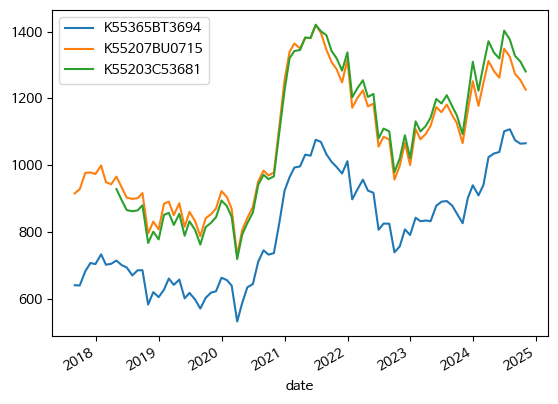

In [112]:
fd.df_prices.plot()

In [79]:
fd = FundDownloader()
#fd.load_tickers(file='funds_irp.csv', path='data')
fd.load_tickers(['K55105BU1062', 'K55234DF2822'])

2 tickers set


In [68]:
fd = FundDownloader()
fd.load_tickers('funds_irp.csv', 'data')
fd.download('20100101', '20241120')

14 tickers loaded


100%|███████████████████████████████████████████████████████████████| 14/14 [00:13<00:00,  1.05it/s]

13.4 secs elapsed, 0.2 secs paused (1.5%)


In [70]:
#fd.data_tickers
fd.df_data

,K55301BU6139,K55206C95800,K55301BU5453,K55301BU5479,K55206C96311,K55210BU2435,K55213C51890,K55223BT1450,K55105BS5067,KR5223AE3357,K55365BT3694,K55207BU0715,K55203C53681,K55234CJ0997
date,,,,,,,,,,,,,,
2017-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN,0.00,NaN,0.00,NaN,-0.41,-1.05,0.00,0.00,0.00,NaN,NaN
2017-09-29,0.00,NaN,NaN,1.32,NaN,3.51,NaN,1.14,0.45,-2.05,-0.11,1.35,NaN,NaN
2017-10-31,2.67,NaN,0.00,4.20,NaN,4.40,NaN,2.79,2.16,0.75,6.55,6.68,NaN,NaN
2017-11-30,3.86,NaN,1.27,5.66,NaN,2.25,NaN,3.62,3.34,3.56,10.42,6.83,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,62.56,37.70,28.09,71.65,43.03,57.37,54.02,48.67,36.83,28.87,72.11,47.35,51.19,43.58
2024-07-31,60.71,38.70,28.03,69.25,43.33,58.27,55.70,49.29,36.89,24.45,73.08,44.70,48.31,42.71
2024-08-30,60.62,38.80,28.39,69.18,43.19,59.13,54.57,50.84,39.57,18.60,67.98,39.13,43.01,43.64


In [55]:
fd = FundDownloader()
fd.load_tickers('funds_irp.csv', 'data', tickers=['K55301BU6139', 'K55206C958x0'])
#fd.data_tickers
fd.tickers

ERROR: 1 funds missing in the fund data


['K55301BU6139']

In [43]:
fd = FundDownloader()
fd.download(['K55105BU1062', 'K55234DF2822'], '20100101', '20241120', msg=True)
fd.df_data

100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.08it/s]

0.3 secs elapsed, 0.0 secs paused (0.0%)


,K55105BU1062,K55234DF2822
date,,
2024-05-20,0.00,0.00
2024-05-21,-0.04,0.10
2024-05-22,0.01,0.43
2024-05-23,0.10,0.40
2024-05-24,-0.20,0.02
...,...,...
2024-11-14,3.60,6.29
2024-11-15,3.39,6.03
2024-11-18,3.21,5.61


In [36]:
fd = FundDownloader()
df = fd._download_xml('K55105BU1062', '20100101', '20241120', msg=True, freq='daily')
df

date
2024-05-20    0.00
2024-05-21   -0.04
2024-05-22    0.01
2024-05-23    0.10
2024-05-24   -0.20
              ... 
2024-11-14    3.60
2024-11-15    3.39
2024-11-18    3.21
2024-11-19    2.77
2024-11-20    2.97
Name: K55105BU1062, Length: 125, dtype: float64

In [23]:
self = fd
ticker='K55105BU1062'
start_date='20100101'
end_date='20241120'
msg=True


url = self.url
headers = self.headers
payload = self.payload.format(ticker=ticker, start_date=start_date, end_date=end_date)
xml = FundDownloader.fetch_fund_data(url, headers, payload, msg=False)
FundDownloader.import_xml_rate(xml=xml)

None
ERROR


In [25]:
url

'2010-01-01'

## Class2

In [53]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
from pf_utils import TimeTracker, set_filename, get_date_minmax, save_dataframe
from tqdm import tqdm
from os.path import isfile, join, splitext

In [193]:
class FundDownloader():
    def __init__(self, file, path='.',
                 url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/",
                 headers = {"Content-Type": "application/xml"}):
        self.url = url
        self.headers = headers
        self.data_tickers = self._load_master(file, path)
        self.tickers = None
        self.df_prices = None
        self.failed = [] # tickers failed to download


    def _load_master(self, file, path='.', index_col='ticker'):
        f = f'{path}/{file}'
        try:
            return pd.read_csv(f, index_col=index_col)
        except Exception as e:
            return print('ERROR: failed to load master')


    def set_tickers(self, tickers=None, col_ticker='ticker'):
        """
        load master file of tickers and its info such as values for conversion from rate to price
        file: master file of assets with ticker, name, adjusting data, etc
        """
        data_tickers = self.data_tickers
        if file is None:
            if tickers is None:
                if data_tickers is None:
                    return print('ERROR')
                else:
                    tickers = data_tickers.index.to_list()
                    
            else:
                df_data = None
                print('WARNING: No meta data for tickers')
        else:
            pfile = f'{path}/{file}'
            df_data = pd.read_csv(pfile, index_col=col_ticker)
            if tickers is None:
                tickers = df_data.index.to_list()
            else:
                tickers = [tickers] if isinstance(tickers, str) else tickers
                n = pd.Index(tickers).difference(df_data.index).size
                if n > 0:
                    print(f'WARNING: {n} funds missing in the fund data')
                    tickers = pd.Index(tickers).intersection(df_data.index).to_list()

        print(f'{len(tickers)} tickers set')
        self.tickers = tickers
        self.data_tickers = df_data
        return None


    def update_master(self, file=None, path='.',
                      interval=5, pause_duration=.1, msg=False,
                      cols_data = ['ticker', 'check1_date', 'check1_price', 'check2_date', 'check2_price']):
        data_tickers = self.data_tickers
        col_ticker = cols_data[0] 
        if data_tickers is None:
            if file is None:
                return print('ERROR: set data file')
            else:
                f = f'{path}/{file}'
                data_tickers = pd.read_csv(f, index_col=col_ticker)
                
        data, failed = list(), list()
        tracker = TimeTracker(auto_start=True)
        for x in tqdm(data_tickers.index):
            # download settlements history to get dates for price history
            df = self.download_settlements(x)
            if df is None:
                failed.append(x)
                continue
            else:
                cond = (df['type'] == '결산')
                start = df.loc[cond, 'start'].max()
                end = df.set_index('start').loc[start, 'end']
                
            # download date & price for conversion from rate to price
            df = self.download_price(x, start, end)
            if df is None:
                failed.append(x)
                continue
            else:
                df = df.set_index('date')['price']
                start = df.index.min()
                end = df.index.max()
                data.append([x, start, df[start], end, df[end]])
            
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if len(data) > 0:
            df = pd.DataFrame().from_records(data, columns=cols_data).set_index(col_ticker)
            cols = ['check1_price', 'check2_price']
            df[cols] = df[cols].astype(float)
            data_tickers.update(df, join='left', overwrite=True)
            print('data_tickers updated')
            self.data_tickers = data_tickers
        return None
        

    def download(self, start_date, end_date, freq='monthly',
                 url=None, headers=None, 
                 interval=5, pause_duration=.1, msg=False):
        tickers = self.tickers
        if tickers is None:
            return print('ERROR: load tickers first')
            
        url = self._check_var(url, self.url)
        headers = self._check_var(headers, self.headers)
        data_tickers = self.data_tickers
        self.failed = [] # reset for new downloading

        # download rates
        tracker = TimeTracker(auto_start=True)
        df_rates = None
        for x in tqdm(tickers):
            sr = self.download_rate(x, start_date, end_date, freq=freq, msg=msg)
            if sr is None:
                self.failed.append(x)
            else:
                df_rates = sr.to_frame() if df_rates is None else pd.concat([df_rates, sr], axis=1)
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if df_rates is None:
            return print('ERROR')
        else:
            n = len(self.failed)
            print(f'WARNING: {n} tickers failed to download') if n>0 else None

        # convert to price
        df_prices = None
        errors, index_errors = list(), list()
        for x in df_rates.columns:
            data = data_tickers.loc[x].to_dict()
            sr_rate = df_rates[x]
            sr_n_err = self._convert_rate(data, sr_rate, percentage=True, msg=msg)
            if sr_n_err is None:
                print(f'ERROR: check data for {x}')
            else:
                sr, err = sr_n_err
                df_prices = sr.to_frame() if df_prices is None else pd.concat([df_prices, sr], axis=1)
                index_errors.append(x)
                errors.append(err)
                
        if len(errors) > 0:
            print(f'Max error of conversions: {max(errors):.2e}')
            self.df_prices = df_prices
            return pd.Series(errors, index=index_errors, name='error')
        else:
            return None


    def save(self, file='fund_prices', path='.'):
        df_prices = self.df_prices
        if df_prices is None:
            print('ERROR')
        
        file = set_filename(file, 'csv')
        name, ext = splitext(file)
        start, end = get_date_minmax(df_prices, date_format='%y%m%d')
        file = f'{name}_{start}_{end}{ext}'
        _ = save_dataframe(df_prices, file, path, msg_succeed=f'{file} saved',
                           msg_fail=f'ERROR: failed to save as {file} exists')


    def download_rate(self, ticker, start_date, end_date, freq='m', msg=False,
                       url=None, headers=None, 
                       payload="""<?xml version="1.0" encoding="utf-8"?>
                                    <message>
                                      <proframeHeader>
                                        <pfmAppName>FS-COM</pfmAppName>
                                        <pfmSvcName>COMFundUnityPrfRtSO</pfmSvcName>
                                        <pfmFnName>prfRtAllSrch</pfmFnName>
                                      </proframeHeader>
                                      <systemHeader></systemHeader>
                                      <COMFundUnityInfoInputDTO>
                                        <standardCd>{ticker:}</standardCd>
                                        <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
                                        <vSrchTrmTo>{end_date:}</vSrchTrmTo>
                                        <vSrchStd>{code_freq:}</vSrchStd>
                                      </COMFundUnityInfoInputDTO>
                                    </message>""",
                       tag_iter='prfRtList', 
                       tags={'date':'standardDt', 'rate':'managePrfRate'}
                      ):
        code_freq = 2 if freq.upper()[0] == 'M' else 1
        kwargs = dict(ticker=ticker, start_date=start_date, end_date=end_date, code_freq=code_freq)
        return self._download_data(payload, tag_iter, tags, **kwargs)
        

    def download_settlements(self, ticker, msg=False,
                             url=None, headers=None,
                             payload = """<?xml version="1.0" encoding="utf-8"?>
                                            <message>
                                              <proframeHeader>
                                                <pfmAppName>FS-COM</pfmAppName>
                                                <pfmSvcName>COMFundSettleExSO</pfmSvcName>
                                                <pfmFnName>settleExSrch</pfmFnName>
                                              </proframeHeader>
                                              <systemHeader></systemHeader>
                                                <COMFundUnityInfoInputDTO>
                                                <standardCd>{ticker:}</standardCd>
                                            </COMFundUnityInfoInputDTO>
                                            </message>""",
                             tag_iter='settleExList', 
                             tags={'start':'trustAccSrt', 'end':'trustAccend', 'price':'standardCot', 
                                   'amount':'uOriginalAmt', 'type':'vSettleGbNm'}
                            ):
        df = self._download_data(payload, tag_iter, tags, ticker=ticker)
        return df


    def download_price(self, ticker, start_date, end_date, freq='m', msg=False,
                        url=None, headers=None,
                        payload = """<?xml version="1.0" encoding="utf-8"?>
                                    <message>
                                      <proframeHeader>
                                        <pfmAppName>FS-COM</pfmAppName>
                                        <pfmSvcName>COMFundPriceModSO</pfmSvcName>
                                        <pfmFnName>priceModSrch</pfmFnName>
                                      </proframeHeader>
                                      <systemHeader></systemHeader>
                                        <COMFundUnityInfoInputDTO>
                                        <standardCd>{ticker:}</standardCd>
                                        <companyCd></companyCd>
                                        <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
                                        <vSrchTrmTo>{end_date:}</vSrchTrmTo>
                                        <vSrchStd>{code_freq:}</vSrchStd>
                                    </COMFundUnityInfoInputDTO>
                                    </message>""",
                        tag_iter='priceModList', 
                        tags={'date':'standardDt', 'price':'standardCot', 'amount':'uOriginalAmt'}
                        ):
        code_freq = 2 if freq.upper()[0] == 'M' else 1
        kwargs = dict(ticker=ticker, start_date=start_date, end_date=end_date, code_freq=code_freq)
        return self._download_data(payload, tag_iter, tags, **kwargs)


    def _download_data(self, payload, tag_iter, tags, 
                       url=None, headers=None, **kwargs_payload):

        url = self._check_var(url, self.url)
        headers = self._check_var(headers, self.headers)
        payload = payload.format(**kwargs_payload)
        xml = FundDownloader.fetch_data(url, headers, payload, msg=False)
        return None if xml is None else FundDownloader.parse_xml(xml, tag_iter, tags)

    
    @staticmethod
    def fetch_data(url, headers, payload, msg=False):
        # Sending the POST request
        try:
            response = requests.post(url, headers=headers, data=payload)
            response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
            return response.text
        except requests.exceptions.RequestException as e:
            return print(f"An error occurred: {e}" if msg else None)

    
    @staticmethod
    def parse_xml(xml, tag_iter, tags):
        """
        tags: dict of column name to tag in list or list of tags
        """
        if isinstance(tags, dict):
            cols = list(tags.keys())
            tags = list(tags.values())
        elif isinstance(tags, (list, tuple)):
            cols = tags
        else:
            return print('ERROR')
            
        root = ET.fromstring(xml)
        data = list()
        try:
            for itr in root.iter(tag_iter):
                d = [itr.find(x).text for x in tags]
                data.append(d)
        except Exception as e:
            return print(f'ERROR: {e}')
    
        if len(data) == 0:
            return print('ERROR')
        
        return pd.DataFrame().from_records(data, columns=cols)
    

    def _convert_rate(self, data, sr_rate, percentage=True, msg=False):
        """
        calc price from rate of return
        data: series or dict
        """
        data_check = [
            (data['check1_date'], data['check1_price']),
            (data['check2_date'], data['check2_price']),
        ]
        # date check
        for dt, _ in data_check:
            try:
                #dt = pd.to_datetime(dt)
                rate = sr_rate.loc[dt]
            except KeyError as e:
                return print(f'ERROR: KeyError {e}') if msg else None
        
        # convert to price with data_check[0]
        dt, price = data_check[0]
        #dt = pd.to_datetime(dt)
        rate = sr_rate.loc[dt]
        if percentage:
            rate = rate/100
            sr_rate = sr_rate/100
        price_base = price / (rate+1)
        sr_price = (sr_rate + 1) * price_base 
    
        # check price
        dt, price = data_check[1]
        e = sr_price.loc[dt]/price - 1
        print(f'error: {e:.2f}') if msg else None
        
        return (sr_price, e)


    def _check_var(self, var_arg, var_self):
        return var_self if var_arg is None else var_arg

## Class3

In [53]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
from pf_utils import TimeTracker, set_filename, get_date_minmax, save_dataframe
from tqdm import tqdm
from os.path import isfile, join, splitext

In [261]:
class FundDownloader():
    def __init__(self, file, path='.', col_ticker='ticker', 
                 cols_check=['check1_date', 'check1_price', 'check2_date', 'check2_price'],
                 url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/",
                 headers = {"Content-Type": "application/xml"}):
        self.col_ticker = col_ticker
        self.cols_check = cols_check
        self.url = url
        self.headers = headers
        self.data_tickers = self._load_master(file, path, col_ticker, cols_check)
        self.tickers = None
        self.df_prices = None
        self.failed = [] # tickers failed to download


    def _load_master(self, file, path, index_col, cols_check):
        """
        read the file of meta data of tickers
        """
        f = f'{path}/{file}'
        try:
            df = pd.read_csv(f, index_col=index_col)
        except Exception as e:
            return print(f'ERROR: failed to load {file}')
        cols = pd.Index(cols_check).difference(df.columns)
        if cols.size > 0:
            df[cols] = None
        return df


    def set_tickers(self, tickers=None, col_ticker='ticker'):
        """
        load master file of tickers and its info such as values for conversion from rate to price
        file: master file of assets with ticker, name, adjusting data, etc
        """
        data_tickers = self.data_tickers
        if data_tickers is None:
            return print('ERROR')
        else:
            tickers_all = data_tickers.index.to_list()

        if tickers is None:
            tickers = tickers_all
        else:
            tickers = [tickers] if isinstance(tickers, str) else tickers
            n = pd.Index(tickers).difference(tickers_all).size
            if n > 0:
                print(f'WARNING: {n} funds missing in the data')
                tickers = pd.Index(tickers).intersection(tickers_all).to_list()

        print(f'{len(tickers)} tickers set')
        self.tickers = tickers
        return None


    def update_master(self, interval=5, pause_duration=.1, msg=False):
        """
        download data and update ticker data for self.cols_check
        """
        data_tickers = self.data_tickers
        if data_tickers is None:
            return print('ERROR')

        col_ticker = self.col_ticker
        cols_check = self.cols_check
        cols_check_float = ['check1_price', 'check2_price']
        
        data, failed = list(), list()
        tracker = TimeTracker(auto_start=True)
        for x in tqdm(data_tickers.index):
            # download settlements history to get dates for price history
            df = self.download_settlements(x)
            if df is None:
                failed.append(x)
                continue
            else:
                cond = (df['type'] == '결산')
                start = df.loc[cond, 'start'].max()
                end = df.set_index('start').loc[start, 'end']
                
            # download date & price for conversion from rate to price
            df = self.download_price(x, start, end)
            if df is None:
                failed.append(x)
                continue
            else:
                sr = df['price']
                start = sr.index.min()
                end = sr.index.max()
                data.append([x, start, sr[start], end, sr[end]])
            
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if len(data) > 0:
            cols = [col_ticker, *cols_check]
            df = pd.DataFrame().from_records(data, columns=cols).set_index(col_ticker)
            df[cols_check_float] = df[cols_check_float].astype(float)
            data_tickers.update(df, join='left', overwrite=True)
            print('data_tickers updated')
            self.data_tickers = data_tickers

        if len(failed) > 0:
            print('WARNING: check output of failed')
            return failed
        

    def download(self, start_date, end_date, freq='monthly',
                 url=None, headers=None,
                 interval=5, pause_duration=.1, msg=False):
        """
        download rate and convert to price using prices in settlement info
        """
        tickers = self.tickers
        if tickers is None:
            return print('ERROR: load tickers first')
            
        url = self._check_var(url, self.url)
        headers = self._check_var(headers, self.headers)
        data_tickers = self.data_tickers
        self.failed = [] # reset for new downloading

        # download rates
        tracker = TimeTracker(auto_start=True)
        df_rates = None
        for x in tqdm(tickers):
            df = self.download_rate(x, start_date, end_date, freq=freq, msg=msg)
            if df is None:
                self.failed.append(x)
            else:
                sr = df['rate'].rename(x)
                df_rates = sr.to_frame() if df_rates is None else pd.concat([df_rates, sr], axis=1)
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if df_rates is None:
            return print('ERROR')
        else:
            n = len(self.failed)
            print(f'WARNING: {n} tickers failed to download') if n>0 else None

        # convert to price
        df_prices = None
        errors, index_errors = list(), list()
        for x in df_rates.columns:
            data = data_tickers.loc[x].to_dict()
            sr_rate = df_rates[x]
            sr_n_err = self._convert_rate(data, sr_rate, percentage=True, msg=msg)
            if sr_n_err is None:
                print(f'ERROR: check data for {x}')
            else:
                sr, err = sr_n_err
                df_prices = sr.to_frame() if df_prices is None else pd.concat([df_prices, sr], axis=1)
                index_errors.append(x)
                errors.append(err)
                
        if len(errors) > 0:
            print(f'Max error of conversions: {max(errors):.2e}')
            self.df_prices = df_prices.sort_index()
            return pd.Series(errors, index=index_errors, name='error')
        else:
            return None


    def save(self, file='fund_prices', path='.'):
        df_prices = self.df_prices
        if df_prices is None:
            print('ERROR')
        
        file = set_filename(file, 'csv')
        name, ext = splitext(file)
        start, end = get_date_minmax(df_prices, date_format='%y%m%d')
        file = f'{name}_{start}_{end}{ext}'
        _ = save_dataframe(df_prices, file, path, msg_succeed=f'{file} saved',
                           msg_fail=f'ERROR: failed to save as {file} exists')


    def download_rate(self, ticker, start_date, end_date, freq='m', msg=False,
                       url=None, headers=None, date_format='%Y%m%d',
                       payload="""<?xml version="1.0" encoding="utf-8"?>
                                    <message>
                                      <proframeHeader>
                                        <pfmAppName>FS-COM</pfmAppName>
                                        <pfmSvcName>COMFundUnityPrfRtSO</pfmSvcName>
                                        <pfmFnName>prfRtAllSrch</pfmFnName>
                                      </proframeHeader>
                                      <systemHeader></systemHeader>
                                      <COMFundUnityInfoInputDTO>
                                        <standardCd>{ticker:}</standardCd>
                                        <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
                                        <vSrchTrmTo>{end_date:}</vSrchTrmTo>
                                        <vSrchStd>{code_freq:}</vSrchStd>
                                      </COMFundUnityInfoInputDTO>
                                    </message>""",
                       tag_iter='prfRtList', 
                       tags={'date':'standardDt', 'rate':'managePrfRate'}
                      ):
        # convert inputs for request
        start_date, end_date = self._convert_dates([start_date, end_date], date_format)
        code_freq = 2 if freq.upper()[0] == 'M' else 1
        kwargs = dict(ticker=ticker, start_date=start_date, end_date=end_date, code_freq=code_freq)
        
        df = self._download_data(payload, tag_iter, tags, **kwargs)
        if df is not None:
            df = df.set_index('date')
            df.index = pd.to_datetime(df.index)
            df['rate'] = df['rate'].astype('float')
        return df
        

    def download_settlements(self, ticker, msg=False,
                             url=None, headers=None,
                             payload = """<?xml version="1.0" encoding="utf-8"?>
                                            <message>
                                              <proframeHeader>
                                                <pfmAppName>FS-COM</pfmAppName>
                                                <pfmSvcName>COMFundSettleExSO</pfmSvcName>
                                                <pfmFnName>settleExSrch</pfmFnName>
                                              </proframeHeader>
                                              <systemHeader></systemHeader>
                                                <COMFundUnityInfoInputDTO>
                                                <standardCd>{ticker:}</standardCd>
                                            </COMFundUnityInfoInputDTO>
                                            </message>""",
                             tag_iter='settleExList', 
                             tags={'start':'trustAccSrt', 'end':'trustAccend', 'price':'standardCot', 
                                   'amount':'uOriginalAmt', 'type':'vSettleGbNm'}
                            ):
        df = self._download_data(payload, tag_iter, tags, ticker=ticker)
        if df is not None:
            df['price'] = df['price'].astype('float')
            df['amount'] = df['amount'].astype('int')
            df['start'] = pd.to_datetime(df['start'])
            df['end'] = pd.to_datetime(df['end'])
        return df


    def download_price(self, ticker, start_date, end_date, freq='m', msg=False,
                        url=None, headers=None, date_format='%Y%m%d',
                        payload = """<?xml version="1.0" encoding="utf-8"?>
                                    <message>
                                      <proframeHeader>
                                        <pfmAppName>FS-COM</pfmAppName>
                                        <pfmSvcName>COMFundPriceModSO</pfmSvcName>
                                        <pfmFnName>priceModSrch</pfmFnName>
                                      </proframeHeader>
                                      <systemHeader></systemHeader>
                                        <COMFundUnityInfoInputDTO>
                                        <standardCd>{ticker:}</standardCd>
                                        <companyCd></companyCd>
                                        <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
                                        <vSrchTrmTo>{end_date:}</vSrchTrmTo>
                                        <vSrchStd>{code_freq:}</vSrchStd>
                                    </COMFundUnityInfoInputDTO>
                                    </message>""",
                        tag_iter='priceModList', 
                        tags={'date':'standardDt', 'price':'standardCot', 'amount':'uOriginalAmt'}
                        ):
        """
        Do not use for long-term history of prices as it seems the prices are not adjusted
        """
        start_date, end_date = self._convert_dates([start_date, end_date], date_format)
        code_freq = 2 if freq.upper()[0] == 'M' else 1
        kwargs = dict(ticker=ticker, start_date=start_date, end_date=end_date, code_freq=code_freq)
        df = self._download_data(payload, tag_iter, tags, **kwargs)
        if df is not None:
            df = df.set_index('date')
            df.index = pd.to_datetime(df.index)
            df['price'] = df['price'].astype('float')
            df['amount'] = df['amount'].astype('int')
        return df


    def _download_data(self, payload, tag_iter, tags, 
                       url=None, headers=None, **kwargs_payload):

        url = self._check_var(url, self.url)
        headers = self._check_var(headers, self.headers)
        payload = payload.format(**kwargs_payload)
        xml = FundDownloader.fetch_data(url, headers, payload, msg=False)
        return None if xml is None else FundDownloader.parse_xml(xml, tag_iter, tags)

    
    @staticmethod
    def fetch_data(url, headers, payload, msg=False):
        # Sending the POST request
        try:
            response = requests.post(url, headers=headers, data=payload)
            response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
            return response.text
        except requests.exceptions.RequestException as e:
            return print(f"An error occurred: {e}" if msg else None)

    
    @staticmethod
    def parse_xml(xml, tag_iter, tags):
        """
        tags: dict of column name to tag in list or list of tags
        """
        if isinstance(tags, dict):
            cols = list(tags.keys())
            tags = list(tags.values())
        elif isinstance(tags, (list, tuple)):
            cols = tags
        else:
            return print('ERROR')
            
        root = ET.fromstring(xml)
        data = list()
        try:
            for itr in root.iter(tag_iter):
                d = [itr.find(x).text for x in tags]
                data.append(d)
        except Exception as e:
            return print(f'ERROR: {e}')
    
        if len(data) == 0:
            return print('ERROR')
        
        return pd.DataFrame().from_records(data, columns=cols)
    

    def _convert_rate(self, data, sr_rate, percentage=True, msg=False):
        """
        calc price from rate of return
        data: series or dict
        """
        data_check = [
            (data['check1_date'], data['check1_price']),
            (data['check2_date'], data['check2_price']),
        ]
        # date check
        for dt, _ in data_check:
            try:
                #dt = pd.to_datetime(dt)
                rate = sr_rate.loc[dt]
            except KeyError as e:
                return print(f'ERROR: KeyError {e}') if msg else None
        
        # convert to price with data_check[0]
        dt, price = data_check[0]
        #dt = pd.to_datetime(dt)
        rate = sr_rate.loc[dt]
        if percentage:
            rate = rate/100
            sr_rate = sr_rate/100
        price_base = price / (rate+1)
        sr_price = (sr_rate + 1) * price_base 
    
        # check price
        dt, price = data_check[1]
        e = sr_price.loc[dt]/price - 1
        print(f'error: {e:.2f}') if msg else None
        
        return (sr_price, e)


    def _check_var(self, var_arg, var_self):
        return var_self if var_arg is None else var_arg


    def _convert_dates(self, dates, date_format='%Y%m%d'):
        """
        convert dates for inputs of request
        """
        if not isinstance(dates, list):
            dates = [dates]
        if isinstance(dates[0], str):
            return pd.to_datetime(dates).strftime(date_format)
        else: # assuming datetime
            return pd.Index(dates).strftime(date_format)

In [262]:
fd = FundDownloader('funds_info_test.csv', 'data')
fd.data_tickers

,name,commission,check1_date,check1_price,check2_date,check2_price
ticker,,,,,,
K55234DF2657,IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re,0.41,NaN,NaN,NaN,NaN
K55234DF2459,IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re,0.41,NaN,NaN,NaN,NaN
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,NaN,NaN,NaN,NaN,NaN
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,0.60,NaN,NaN,NaN,NaN
K55105BU1161,삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금),0.42,NaN,NaN,NaN,NaN


In [263]:
fd.set_tickers()
fd.tickers

5 tickers set


['K55234DF2657',
 'K55234DF2459',
 'K55301DW1763',
 'K55301BU6139',
 'K55105BU1161']

In [264]:
fd.update_master()
fd.data_tickers

100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.02it/s]


1.0 secs elapsed, 0.0 secs paused (0.0%)
data_tickers updated


,name,commission,check1_date,check1_price,check2_date,check2_price
ticker,,,,,,
K55234DF2657,IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re,0.41,2023-03-31,983.37,2024-02-29,1065.19
K55234DF2459,IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re,0.41,2023-03-31,1003.42,2024-02-29,1108.61
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,NaN,2023-03-31,999.62,2024-02-29,1138.85
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,0.60,2023-03-31,1225.66,2024-02-29,1395.41
K55105BU1161,삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금),0.42,2023-04-28,1143.56,2024-03-29,1282.01


In [266]:
start_date, end_date = '20100101', '20241121'
errs = fd.download(start_date, end_date)
fd.df_prices

100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.05it/s]

0.6 secs elapsed, 0.0 secs paused (0.0%)
Max error of conversions: 1.17e-05


,K55234DF2657,K55234DF2459,K55301DW1763,K55301BU6139,K55105BU1161
date,,,,,
2017-08-31,NaN,NaN,NaN,NaN,995.178836
2017-09-29,NaN,NaN,NaN,920.787319,1006.623392
2017-10-31,NaN,NaN,NaN,945.372340,1018.067949
2017-11-30,NaN,NaN,NaN,956.329709,1028.318291
2017-12-29,NaN,NaN,NaN,952.278245,1033.294185
...,...,...,...,...,...
2024-06-28,1111.012193,1167.237486,1221.140847,1496.831865,1295.424290
2024-07-31,1120.504572,1175.928605,1207.259895,1479.797300,1301.395363
2024-08-30,1128.785157,1181.790057,1206.685510,1478.968591,1325.080620


In [267]:
fd.df_prices.index

DatetimeIndex(['2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30',
               '2017-12-29', '2018-01-31', '2018-02-28', '2018-03-30',
               '2018-04-30', '2018-05-31', '2018-06-29', '2018-07-31',
               '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-29',
               '2019-04-30', '2019-05-31', '2019-06-28', '2019-07-31',
               '2019-08-30', '2019-09-30', '2019-10-31', '2019-11-29',
               '2019-12-31', '2020-01-31', '2020-02-28', '2020-03-31',
               '2020-04-29', '2020-05-29', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-29', '2020-10-30', '2020-11-30',
               '2020-12-31', '2021-01-29', '2021-02-26', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-30',
               '2021-08-31', '2021-09-30', '2021-10-29', '2021-11-30',
               '2021-12-31', '2022-01-28', '2022-02-28', '2022-03-31',
      

In [242]:
data_tickers['check1_price']

ticker
K55234DF2657     983.37
K55234DF2459    1003.42
K55301DW1763     999.62
K55301BU6139    1225.66
K55105BU1161    1143.56
Name: check1_price, dtype: float64

In [225]:
fd = FundDownloader('funds_info_test.csv', 'data')
#df = fd.download_settlements('K55210BU2385')
#df = fd.download_price('K55207BU0715', '20100101', '20241120')
df = fd.download_rate('K55210BU2385', '20100101', '20241120')

In [226]:
df

,rate
date,
20170831,0.00
20170929,2.48
20171031,2.75
20171130,1.23
20171229,1.70
...,...
20240628,36.94
20240731,38.68
20240830,39.56


In [227]:
df['rate']

date
20170831     0.00
20170929     2.48
20171031     2.75
20171130     1.23
20171229     1.70
            ...  
20240628    36.94
20240731    38.68
20240830    39.56
20240930    40.89
20241031    41.14
Name: rate, Length: 87, dtype: float64

In [224]:
df['price']

date
20241031    1226.47
20240930    1255.27
20240830    1273.85
20240731    1324.87
20240628    1349.18
             ...   
20171229    1087.65
20171130    1092.98
20171031    1091.46
20170929    1036.97
20170831    1023.12
Name: price, Length: 87, dtype: float64

In [122]:
fd = FundDownloader()
#tickers = ['K55301BU6139', 'K55206C95800', 'K55365BT3694']
#tickers = ['K55365BT3694', 'K55207BU0715', 'K55203C53681']
tickers = ['K55210BU2385', 'K55210BU2450']

fd.load_tickers(file='funds_info_241121.csv', path='data', tickers=tickers)
fd.download('20100101', '20241120')

2 tickers set


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.64it/s]

0.3 secs elapsed, 0.0 secs paused (0.0%)
ERROR: check data for K55210BU2385
ERROR: check data for K55210BU2450


In [124]:
fd.data_tickers

,name,commission,check1_date,check1_price,check2_date,check2_price
ticker,,,,,,
K55234DF2657,IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re,0.410,NaN,NaN,NaN,NaN
K55234DF2459,IBK로우코스트TDF2035증권자투자신탁[혼합-재간접형]종류C-Re,0.410,NaN,NaN,NaN,NaN
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,NaN,NaN,NaN,NaN,NaN
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,0.600,NaN,NaN,NaN,NaN
K55105BU1161,삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금),0.420,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
K55105BT9936,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금),0.540,NaN,NaN,NaN,NaN
K55223BT1096,KB온국민TDF2030증권투자신탁(주식혼합-재간접형)C-퇴직e,0.360,NaN,NaN,NaN,NaN
K55301BU6113,미래에셋전략배분TDF2030혼합자산자투자신탁 종류C-P2e,0.570,NaN,NaN,NaN,NaN


In [59]:
fd.save(path='data')

fund_prices_170831_241031.csv saved


In [33]:
from datetime import datetime
date = '2014-07-01'
format_from = '%Y-%m-%d'
datetime.strptime(date, format_from).strftime('%y%m%d')

'140701'

In [259]:
d = ('2010-01-01', '2024-11-20')
a, b = pd.to_datetime(d).strftime('%y%m%d')
a

'100101'

In [260]:
d = ('2010-01-01', '2024-11-20')
pd.Index(pd.to_datetime(d)).strftime('%y%m%d')
a

'100101'

## testing

In [62]:
fetch_data = FundDownloader.fetch_data

In [71]:
url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/"
headers = {
"Content-Type": "application/xml",  # Indicating that we're sending XML data
}


payload = """<?xml version="1.0" encoding="utf-8"?>
        <message>
          <proframeHeader>
            <pfmAppName>FS-COM</pfmAppName>
            <pfmSvcName>COMFundUnityPrfRtSO</pfmSvcName>
            <pfmFnName>prfRtAllSrch</pfmFnName>
          </proframeHeader>
          <systemHeader></systemHeader>
          <COMFundUnityInfoInputDTO>
            <standardCd>{ticker:}</standardCd>
            <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
            <vSrchTrmTo>{end_date:}</vSrchTrmTo>
            <vSrchStd>{code_freq:}</vSrchStd>
          </COMFundUnityInfoInputDTO>
        </message>"""
payload = payload.format(ticker='K55207BU0715', start_date='20200101', end_date='20240101', code_freq=2)



payload = """
<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-DIS2</pfmAppName>
    <pfmSvcName>DISIntSrchSO</pfmSvcName>
    <pfmFnName>selectFndList</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <DISFndIntSrchDTO>
    <uRefundRsnGbNm></uRefundRsnGbNm>
    <managementGb></managementGb>
    <fundNm>K55207BU0715</fundNm>
    <pageCnt>1</pageCnt>
</DISFndIntSrchDTO>
</message>
"""


payload = """
<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundSettleExSO</pfmSvcName>
    <pfmFnName>settleExSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <COMFundUnityInfoInputDTO>
    <standardCd>K55105BU1062</standardCd>
    <companyCd>A01005</companyCd>
</COMFundUnityInfoInputDTO>
</message>
"""


payload = """
<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundPriceModSO</pfmSvcName>
    <pfmFnName>priceModSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <COMFundUnityInfoInputDTO>
    <standardCd>K55207BU0715</standardCd>
    <companyCd>A01015</companyCd>
    <vSrchTrmFrom>20241021</vSrchTrmFrom>
    <vSrchTrmTo>20241121</vSrchTrmTo>
    <vSrchStd>1</vSrchStd>
</COMFundUnityInfoInputDTO>
</message>"""


headers = {
    "Accept": "text/xml",
    "Accept-Encoding": "gzip, deflate, br, zstd",
    "Accept-Language": "en-US,en;q=0.8",
    "Connection": "keep-alive",
    "Content-Length": "425",
    "Content-Type": "text/xml",
    "Host": "dis.kofia.or.kr",
    "Origin": "https://dis.kofia.or.kr",
    "Referer": "https://dis.kofia.or.kr/websquare/webSquare.jsp?w2xPath=/wq/fundMgr/DISFundMgrFundWebSrch.xml",
    "Sec-CH-UA": '"Brave";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
    "Sec-CH-UA-Mobile": "?0",
    "Sec-CH-UA-Platform": '"Linux"',
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-origin",
    "Sec-GPC": "1",
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}


fetch_data(url, headers, payload)

'<?xml version="1.0" encoding="UTF-8"?><root><message>\r\n'

In [76]:
url = "https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/"
headers = {
"Content-Type": "application/xml",  # Indicating that we're sending XML data
}

payload = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundSettleExSO</pfmSvcName>
    <pfmFnName>settleExSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <COMFundUnityInfoInputDTO>
    <standardCd>K55105BU1062</standardCd>
    <companyCd>A01005</companyCd>
</COMFundUnityInfoInputDTO>
</message>"""

payload = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundSettleExSO</pfmSvcName>
    <pfmFnName>settleExSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <COMFundUnityInfoInputDTO>
    <standardCd>K55105BU1062</standardCd>
</COMFundUnityInfoInputDTO>
</message>"""


xml = fetch_data(url, headers, payload)

root = ET.fromstring(xml)
tag_iter = "settleExList"
items = ['trustAccSrt', 'trustAccend', 'standardCot', 'uOriginalAmt', 'vSettleGbNm']
data = list()
for r in root.iter(tag_iter):
    d = [r.find(x).text for x in items]
    data.append(d)

data

[['20230421', '20240420', '1177.83', '66674', '결산'],
 ['20220421', '20230420', '1116.96', '73636', '결산'],
 ['20210421', '20220420', '1164.56', '74929', '결산'],
 ['20200421', '20210420', '1211.07', '33704', '결산'],
 ['20190421', '20200420', '1048.98', '16558', '결산'],
 ['20180421', '20190420', '1047.66', '4785', '결산'],
 ['20170803', '20180420', '1029.27', '2646', '결산']]

In [78]:
def parse_xml(xml, tag_iter, tags):
    if isinstance(tags, dict):
        cols = list(tags.values())
        tags = list(tags.keys())
    elif isinstance(tags, (list, tuple)):
        cols = tags
    else:
        return print('ERROR')
        
    root = ET.fromstring(xml)
    data = list()
    try:
        for itr in root.iter(tag_iter):
            d = [itr.find(x).text for x in tags]
            data.append(d)
    except Exception as e:
        return print(f'ERROR: {e}')

    if len(data) == 0:
        return print('ERROR')
    
    return pd.DataFrame().from_records(data, columns=cols)

In [95]:
payload = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundSettleExSO</pfmSvcName>
    <pfmFnName>settleExSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <COMFundUnityInfoInputDTO>
    <standardCd>K55105BU1062</standardCd>
</COMFundUnityInfoInputDTO>
</message>"""


xml = fetch_data(url, headers, payload)

root = ET.fromstring(xml)

tag_iter = "settleExList"
tags = ['trustAccSrt', 'trustAccend', 'standardCot', 'uOriginalAmt', 'vSettleGbNm']
cols = ['start', 'end', 'price', 'amount', 'type']
tags = dict(zip(tags, cols))
df = parse_xml(xml, tag_iter, tags)
#df['start'] = pd.to_datetime(df['start'])
#df['end'] = pd.to_datetime(df['end'])

In [96]:
cond = (df['type'] == '결산')
cond = cond & (df['start'] == df['start'].max())
start_date, end_date = df.loc[cond, ['start', 'end']].iloc[0].to_list()

In [98]:
start_date, end_date

('20230421', '20240420')

In [99]:
payload = """<?xml version="1.0" encoding="utf-8"?>
<message>
  <proframeHeader>
    <pfmAppName>FS-COM</pfmAppName>
    <pfmSvcName>COMFundPriceModSO</pfmSvcName>
    <pfmFnName>priceModSrch</pfmFnName>
  </proframeHeader>
  <systemHeader></systemHeader>
    <COMFundUnityInfoInputDTO>
    <standardCd>K55207BU0715</standardCd>
    <companyCd>A01015</companyCd>
    <vSrchTrmFrom>{start_date:}</vSrchTrmFrom>
    <vSrchTrmTo>{end_date:}</vSrchTrmTo>
    <vSrchStd>2</vSrchStd>
</COMFundUnityInfoInputDTO>
</message>"""

payload = payload.format(start_date=start_date, end_date=end_date)
xml = fetch_data(url, headers, payload)

root = ET.fromstring(xml)

tag_iter = "priceModList"
tags = ['standardDt', 'standardCot', 'uOriginalAmt']
cols = ['date', 'price', 'amount']
tags = dict(zip(tags, cols))
df = parse_xml(xml, tag_iter, tags)
df = df.set_index('date')

In [101]:
df.index = pd.to_datetime(df.index)
df

,price,amount
date,,
2024-03-29,1312.42,85482
2024-02-29,1247.5,87085
2024-01-31,1177.69,88923
2023-12-29,1251.58,89014
2023-11-30,1187.97,88180
2023-10-31,1088.81,87877
2023-09-27,1150.38,86765
2023-08-31,1175.02,87261
2023-07-31,1207.31,87897


In [104]:
start_date

'20230421'

In [111]:
start = df.index[df.index>=start_date].min()
end = df.index[df.index<=end_date].max()
start, end

(Timestamp('2023-04-28 00:00:00'), Timestamp('2024-03-29 00:00:00'))

In [113]:
df.loc[start, 'price']

'1142.15'

In [114]:
df.loc[end, 'price']

'1312.42'

In [2]:
import FinanceDataReader as fdr

x = 'KOSDAQ'
x = 'ETF/KR'
fdr.StockListing(x)



,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1055010,2,100,0.01,1055041.0,0.8855,48780,51463,89208
1,357870,6,TIGER CD금리투자KIS(합성),55290,3,0,0.00,55294.0,0.8849,38876,2149,70086
2,069500,1,KODEX 200,33285,2,235,0.71,33342.0,-10.0779,462303,15377,55353
3,360750,4,TIGER 미국S&P500,20730,2,180,0.88,20743.0,10.5135,997703,20678,54872
4,423160,6,KODEX KOFR금리액티브(합성),108740,2,30,0.03,108705.0,0.8628,10861,1181,44959
...,...,...,...,...,...,...,...,...,...,...,...,...
920,412560,2,TIGER BBIG레버리지,1968,5,-32,-1.60,1975.0,-5.2133,5050,9,18
921,470310,2,UNICORN 생성형AI강소기업액티브,7010,2,140,2.04,7030.0,-16.2196,127,0,18
922,306530,3,HANARO 코스닥150선물레버리지,7280,2,100,1.39,7337.0,-21.8716,9885,71,17
923,456100,6,HANARO 유로존국채25년플러스(합성 H),51760,2,745,1.46,51773.0,-2.2889,1,0,17


In [4]:
txt = "KKKKK"

x = txt.zfill(10)

print(x)

00000KKKKK


# test

In [13]:
import pandas as pd
import numpy as np

def limit_weights(weights, limit=0.1):
    """
    Limits weights and redistributes excedent amount
    proportionally.

    ex:
        - weights are {a: 0.7, b: 0.2, c: 0.1}
        - call with limit=0.5
        - excess 0.2 in a is ditributed to b and c
            proportionally.
            - result is {a: 0.5, b: 0.33, c: 0.167}

    Args:
        * weights (Series): A series describing the weights
        * limit (float): Maximum weight allowed
    """
    if 1.0 / limit > len(weights):
        raise ValueError("invalid limit -> 1 / limit must be <= len(weights)")

    if isinstance(weights, dict):
        weights = pd.Series(weights)

    if np.round(weights.sum(), 1) != 1.0:
        raise ValueError("Expecting weights (that sum to 1) - sum is %s" % weights.sum())

    res = np.round(weights.copy(), 4)
    to_rebalance = (res[res > limit] - limit).sum()

    ok = res[res < limit]
    ok += (ok / ok.sum()) * to_rebalance

    res[res > limit] = limit
    res[res < limit] = ok

    if any(x > limit for x in res):
        return limit_weights(res, limit=limit)

    return res




In [24]:
import pandas as pd
import numpy as np



def redistribute_weights(weights, limit=0.1):
    """
    Discards elements below the limit and redistributes their weights 
    to the remaining elements proportionally based on their original weights.

    Args:
        weights (Series or dict): A series or dictionary describing the weights.
        limit (float): Minimum threshold for keeping elements.

    Returns:
        Series: Adjusted weights after discarding and redistributing.
    """
    if isinstance(weights, dict):
        weights = pd.Series(weights)

    if np.round(weights.sum(), 1) != 1.0:
        raise ValueError("Expecting weights (that sum to 1) - sum is %s" % weights.sum())

    # Separate weights above and below the limit
    above_limit = weights[weights >= limit]
    below_limit = weights[weights < limit]

    if above_limit.empty:
        #raise ValueError("No weights above the limit. All weights have been discarded.")
        print("WARNING:No weights above the limit. All weights have been discarded.")
        return weights.to_dict()

    # Redistribute the sum of discarded weights to remaining weights proportionally
    discarded_sum = below_limit.sum()
    redistributed_weights = above_limit + (above_limit / above_limit.sum()) * discarded_sum

    # Normalize weights to ensure they sum to 1
    return np.round(redistributed_weights / redistributed_weights.sum(), 4).to_dict()


In [25]:
w = {'a':.1, 'b':.3, 'c':.05, 'd':.55}
redistribute_weights(w, 0.05)

{'a': 0.1, 'b': 0.3, 'c': 0.05, 'd': 0.55}

In [26]:
import pandas as pd
import numpy as np


def redistribute_weights(weights, threshold=0.1, n_min=0, none_if_fail=False):
    """
    Discards elements below the threshold and redistributes their weights 
    to the remaining elements proportionally based on their original weights.

    Args:
        weights (Series or dict): A series or dictionary describing the weights.
        threshold (float): Minimum threshold for keeping elements.

    Returns:
        Series: Adjusted weights after discarding and redistributing.
    """
    if isinstance(weights, dict):
        weights = pd.Series(weights)

    if np.round(weights.sum(), 1) != 1.0:
        raise ValueError("Expecting weights (that sum to 1) - sum is %s" % weights.sum())

    # Separate weights below the threshold
    above_threshold = weights[weights >= threshold]
    below_threshold = weights[weights < threshold]

    if len(above_threshold) <= n_min:
        #print("WARNING:No weights above the limit. All weights have been discarded.")
        return None if none_if_fail else weights.to_dict()

    # Redistribute the sum of discarded weights to remaining weights proportionally
    discarded_sum = below_threshold.sum()
    redistributed_weights = above_threshold + (above_threshold / above_threshold.sum()) * discarded_sum

    # Normalize weights to ensure they sum to 1
    result = np.round(redistributed_weights / redistributed_weights.sum(), 4).to_dict()
    if discarded_sum > 0:
        result = {**result, **{k:0 for k in below_threshold.keys()}}
    return result

In [30]:
w = {'a':.1, 'b':.3, 'c':.05, 'd':.55}
redistribute_weights(w, 0.6, none_if_fail=False)

{'a': 0.1, 'b': 0.3, 'c': 0.05, 'd': 0.55}

In [6]:
w = {'a':.25, 'b':.25, 'c':.25, 'd':.25}
redistribute_weights(w, 0.26)

{'a': 0.25, 'b': 0.25, 'c': 0.25, 'd': 0.25}

In [8]:
w.empty

AttributeError: 'dict' object has no attribute 'empty'

# test

In [ ]:
import bt
import pandas as pd


data = bt.get('spy,agg', start='2023-01-01')
lb = pd.DateOffset(months=12)

# create two separate algo stacks and combine the branches
logging_stack = bt.AlgoStack(
                    #bt.algos.RunMonthly(),
                    bt.algos.RunEveryNPeriods(21),
                    bt.algos.SelectAll(),
                    bt.algos.SelectMomentum(n=1, lookback=lb),
                    bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}')
                    )
trading_stack = bt.AlgoStack(
                    bt.algos.RunEveryNPeriods(255),
                    bt.algos.SelectAll(),
                    bt.algos.SelectMomentum(n=1, lookback=lb),
                    bt.algos.WeighEqually(),
                    bt.algos.Rebalance(),
                    bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}')
                    )
branch_stack =  bt.AlgoStack(
                    # Upstream algos could go here...
                    bt.algos.Or( [ logging_stack, trading_stack ] ), 
                    None
                    # Downstream algos could go here...
                    )

s = bt.Strategy('strategy', [branch_stack], ['spy', 'agg'])
#s = bt.Strategy('strategy', [trading_stack], ['spy', 'agg'])
t = bt.Backtest(s, data)
r = bt.run(t)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.48it/s]


strategy:2024-02-02 00:00:00. Value:1000000, Price:100.0000
strategy:2024-04-04 00:00:00. Value:1054036, Price:105.4036
strategy:2024-06-04 00:00:00. Value:1073004, Price:107.3004
strategy:2024-08-05 00:00:00. Value:1084076, Price:108.4076
strategy:2024-10-03 00:00:00. Value:1145717, Price:114.5717


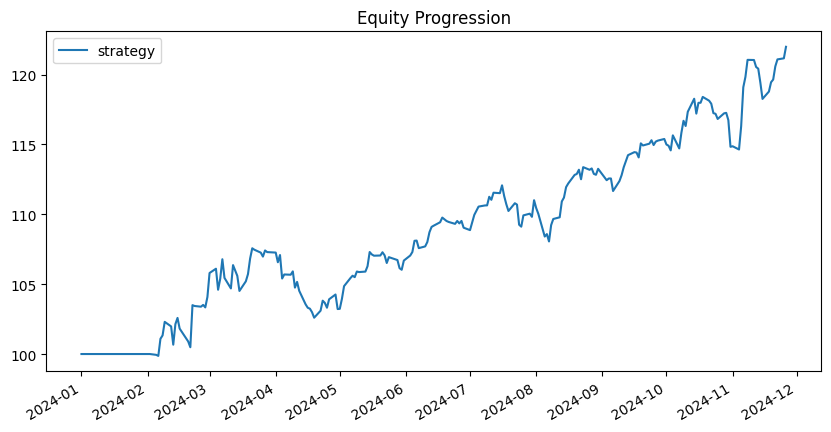

In [41]:
import bt
import pandas as pd


data = bt.get('spy,agg,mtum', start='2024-01-01')
lb = pd.DateOffset(months=1)


trading_stack = bt.AlgoStack(
                    #bt.algos.RunEveryNPeriods(61, offset=0),
                    #bt.algos.RunEveryNPeriods(61, offset=126),
                    #bt.algos.RunEveryNPeriods(61, offset=120),
                    bt.algos.RunEveryNPeriods(42, offset=22),
                    bt.algos.SelectAll(),
                    bt.algos.SelectMomentum(n=2, lookback=lb),
                    bt.algos.WeighEqually(),
                    bt.algos.Rebalance(),
                    bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}')
                    )

s = bt.Strategy('strategy', [trading_stack])
t = bt.Backtest(s, data)
r = bt.run(t)
_ = r.plot(figsize=(10,5))

In [30]:
#dir(pd.DateOffset(months=3))
idx = pd.DateOffset(months=3)

In [37]:
len(data.loc[:data.index[0]+idx])

63

In [43]:
data.index[0]+idx+idx

Timestamp('2024-07-02 00:00:00')

In [42]:
idx + idx

TypeError: Argument 'other' has incorrect type (expected datetime.datetime, got DateOffset)

In [48]:
data.index[0] + pd.DateOffset(months=3, months=31)

SyntaxError: keyword argument repeated: months (704097208.py, line 1)

In [52]:
[x+y for x,y in ((1,2), (3,4))]

[3, 7]

In [2]:
a= {1:2, 2:3}
b={1:3}
#c = {**a, **b}
c = {**b, **a}
c

{1: 2, 2: 3}

# test

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.00it/s]

strategy:2024-01-31 00:00:00. Value:1000000, Price:100.0000


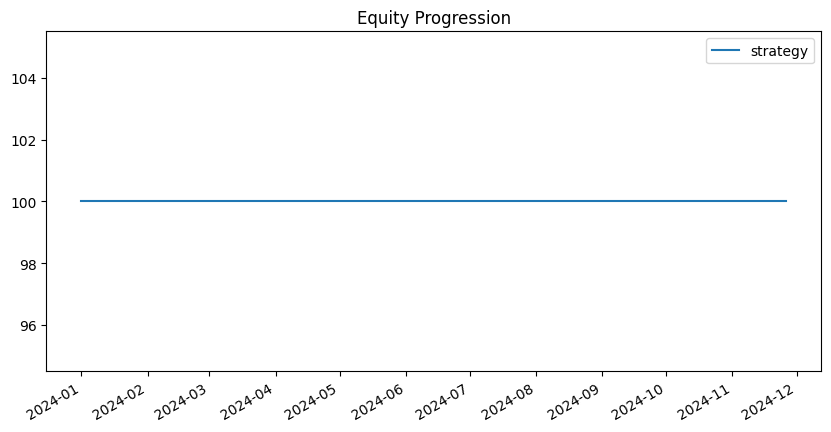

In [4]:
import bt
import pandas as pd


data = bt.get('spy,agg,mtum', start='2024-01-01')
lb = pd.DateOffset(months=1)


trading_stack = bt.AlgoStack(
                    bt.algos.RunAfterDays(20),
                    bt.algos.RunOnce(),
                    bt.algos.SelectAll(),
                    bt.algos.SelectMomentum(n=2, lookback=lb),
                    bt.algos.WeighEqually(),
                    bt.algos.Rebalance(),
                    bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}')
                    )

s = bt.Strategy('strategy', [trading_stack])
t = bt.Backtest(s, data)
r = bt.run(t)
_ = r.plot(figsize=(10,5))

In [5]:
import pandas as pd

def sum_dateoffsets(offset1, offset2):
    """
    Sums two pandas DateOffset objects by combining their kwargs.
    
    Parameters:
        offset1 (pd.DateOffset): The first DateOffset.
        offset2 (pd.DateOffset): The second DateOffset.
        
    Returns:
        pd.DateOffset: The resulting DateOffset.
    """
    # Extract kwargs from both offsets
    kwargs1 = offset1.kwds
    kwargs2 = offset2.kwds
    
    # Sum the respective kwargs
    combined_kwargs = {
        key: kwargs1.get(key, 0) + kwargs2.get(key, 0)
        for key in set(kwargs1) | set(kwargs2)
    }
    
    # Return a new DateOffset with the combined kwargs
    return pd.DateOffset(**combined_kwargs)

# Example usage:
offset1 = pd.DateOffset(days=10, months=1, years=1)
offset2 = pd.DateOffset(weeks=2, months=2)

result = sum_dateoffsets(offset1, offset2)
print(result)  # Output: <DateOffset: days=10, months=3, years=1, weeks=2>


<DateOffset: days=10, months=3, weeks=2, years=1>


In [7]:
offset1 = pd.DateOffset(months=3)
offset2 = pd.DateOffset(months=2)
sum_dateoffsets(offset1, offset2)

<DateOffset: months=5>

In [8]:
offset1 = pd.DateOffset(months=3)
offset2 = pd.DateOffset(years=2)
sum_dateoffsets(offset1, offset2)

<DateOffset: months=3, years=2>